# Introduction

### What is Yu-Gi-Oh

### How dataset was obtained

### Motivation for data analysis




### Problem Statement

To Summarise, The Questions We Are Looking To Answer:
- Predict a monster's `level` from its `attack` and `defence`
- Determine if and how a monster's `level` impacts its `price`
- Predict `price` of card from its attributes

Pointers <br>
Make a point on how data is cleaned 
Still do EDA, and see the exceptions 
AKA showcase you know your stuff 
Can split monsters based on can summon normally, or need sacrifice to find. 
 - Can become categorical (bucketing, similar to histograms) 
Show the trend of powercreep over the sets

Typically we notice boss cards
    - Big high levels, look cool
    - Big attack and defence levels, capable to 3-4 shot your opponent.
    - Big beefy bois
    
Confirm our suspicions
    - Big high level bois have high attack and defence, go confirm it out.
    - [ Predict level based on attack and d
    efence ]
    
How do i identify a boss card?
    
Typicially, strong cards are expensive, thats kind of the point.
If i pull a random card from a booster pack i never see before. What attributes can i see of a card, that indicates its expensive?
    - [ Predict price of card (Linear Regressions) ]
    
Do cards that are higher level cost more?


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data_file_location = 'card_data.csv'

yugioh_data = pd.read_csv(data_file_location,index_col=0)
yugioh_data.head(10) # quick look of data

id                              name        type frameType  \
0  34541863          "A" Cell Breeding Device  Spell Card     spell   
1  64163367                "A" Cell Incubator  Spell Card     spell   
2  91231901     "A" Cell Recombination Device  Spell Card     spell   
3  73262676            "A" Cell Scatter Burst  Spell Card     spell   
4  98319530        "Infernoble Arms - Almace"  Spell Card     spell   
5  37478723      "Infernoble Arms - Durendal"  Spell Card     spell   
6  64867422    "Infernoble Arms - Hauteclere"  Spell Card     spell   
7  90861137       "Infernoble Arms - Joyeuse"  Spell Card     spell   
8  80845034  "The Sinful Spoils Hunter Fiend"  Spell Card     spell   
9  44256816                 1st Movement Solo  Spell Card     spell   

                                                desc        race  \
0  During each of your Standby Phases, put 1 A-Co...  Continuous   
1  Each time an A-Counter(s) is removed from play...  Continuous   
2  Target 1 face-up monster on the field; send 1 ...  Quick-Play   
3  Select 1 face-up "Alien" monster you control. ...  Quick-Play   
4  While this card is equipped to a monster: You ...       Equip   
5  While this card is equipped to a monster: You ...       Equip   
6  While this card is equipped to a monster: You ...       Equip   
7  While this card is equipped to a monster: You ...       Equip   
8  Add 1 "Diabellestarr" monster from your Deck o...  Quick-Play   
9  If you control no monsters: Special Summon 1 L...      Normal   

       archetype                                          card_sets  \
0          Alien  [{'set_name': 'Force of the Breaker', 'set_cod...   
1          Alien  [{'set_name': "Gladiator's Assault", 'set_code...   
2          Alien  [{'set_name': 'Invasion: Vengeance', 'set_code...   
3          Alien  [{'set_name': 'Strike of Neos', 'set_code': 'S...   
4   Noble Knight  [{'set_name': 'Duelist Nexus', 'set_code': 'DU...   
5   Noble Knight  [{'set_name': '2021 Tin of Ancient Battles', '...   
6   Noble Knight  [{'set_name': '2021 Tin of Ancient Battles', '...   
7   Noble Knight  [{'set_name': '2021 Tin of Ancient Battles', '...   
8  Sinful Spoils                                                NaN   
9      Melodious  [{'set_name': '2015 Mega-Tin Mega Pack', 'set_...   

                                         card_images  \
0  [{'id': 34541863, 'image_url': 'https://images...   
1  [{'id': 64163367, 'image_url': 'https://images...   
2  [{'id': 91231901, 'image_url': 'https://images...   
3  [{'id': 73262676, 'image_url': 'https://images...   
4  [{'id': 98319530, 'image_url': 'https://images...   
5  [{'id': 37478723, 'image_url': 'https://images...   
6  [{'id': 64867422, 'image_url': 'https://images...   
7  [{'id': 90861137, 'image_url': 'https://images...   
8  [{'id': 80845034, 'image_url': 'https://images...   
9  [{'id': 44256816, 'image_url': 'https://images...   

                                         card_prices  atk  def  level  \
0  [{'cardmarket_price': '0.10', 'tcgplayer_price...  NaN  NaN    NaN   
1  [{'cardmarket_price': '0.07', 'tcgplayer_price...  NaN  NaN    NaN   
2  [{'cardmarket_price': '0.10', 'tcgplayer_price...  NaN  NaN    NaN   
3  [{'cardmarket_price': '0.12', 'tcgplayer_price...  NaN  NaN    NaN   
4  [{'cardmarket_price': '0.00', 'tcgplayer_price...  NaN  NaN    NaN   
5  [{'cardmarket_price': '0.16', 'tcgplayer_price...  NaN  NaN    NaN   
6  [{'cardmarket_price': '0.02', 'tcgplayer_price...  NaN  NaN    NaN   
7  [{'cardmarket_price': '0.18', 'tcgplayer_price...  NaN  NaN    NaN   
8  [{'cardmarket_price': '0.00', 'tcgplayer_price...  NaN  NaN    NaN   
9  [{'cardmarket_price': '2.85', 'tcgplayer_price...  NaN  NaN    NaN   

  attribute pend_desc monster_desc  scale  linkval linkmarkers banlist_info  
0       NaN       NaN          NaN    NaN      NaN         NaN          NaN  
1       NaN       NaN          NaN    NaN      NaN         NaN          NaN  
2       NaN       NaN          NaN    NaN

# Exploratory Data Analysis [EDA]

In [3]:
# Information about the Variables
yugioh_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12815 entries, 0 to 12814
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12815 non-null  int64  
 1   name          12815 non-null  object 
 2   type          12815 non-null  object 
 3   frameType     12815 non-null  object 
 4   desc          12815 non-null  object 
 5   race          12814 non-null  object 
 6   archetype     7443 non-null   object 
 7   card_sets     12374 non-null  object 
 8   card_images   12815 non-null  object 
 9   card_prices   12815 non-null  object 
 10  atk           8331 non-null   float64
 11  def           7943 non-null   float64
 12  level         7942 non-null   float64
 13  attribute     8331 non-null   object 
 14  pend_desc     322 non-null    object 
 15  monster_desc  322 non-null    object 
 16  scale         337 non-null    float64
 17  linkval       388 non-null    float64
 18  linkmarkers   388 non-null    o

<b> Listing down observations of dataset: </b>

- 20 columns and 12815 rows.
- 1 variables identified as int64 by default, and it seems is indeed Numeric.
- 5 variables identified as float64 by default, and it seems are indeed Numeric.
- 14 variables identified as object by default, 
    - 4 variables are Strings, which represent card text and should not be used for Categorical values.
        - (name, desc, pend_desc, monster_desc)
    - 1 variables is a JSON object, which represent link data to card images and should not be used for Categorical values.
        - (card_images)
    - 3 variables are JSON objects, which represent Categorical values.
        - (card_sets, linkmarkers, banlist_info)
    - 5 variables are Strings, which represent Categorical values.
        - (type, frameType, race, archetype, attribute)
    - 1 variables is a JSON object, which represent multiple Numeric values.
        - (card_prices)

None of the variables/features seem to have any missing value (have to check again, carefully).
- card_prices is 

<b> Cleaning actions to be taken: </b> <br>
    - Extract out numerical values from composite JSON object of bundled prices (`card_prices`)
        - Extract our prices of each shop
    - Drop columns irrelevant to our problem statement
        - Text descriptions
        - Images
        - Values deemed irrelevant
    - Drop non-monster card types
    
    
<b> Creating new and additional columns for readibility + ease of use: </b> <br> 
    - New column `avg_price`, which is the mean price from different shops, ignoring null values
    - New column `tribute`, which bins `Level` dependant on number of sacrifce monsters needed to summon the monster.
    - Generalising variables into 0s and 1s for binary classification
        - New column `sacrifice` => if sacrificed required for monster (`level` 5 and above)
        - New column `effect` => if monster has an effect (`type` is not normal monster)
        - New column `ban` => if card is banned in any format (`banlist_info` is not empty)

### Drop irrelevant columns about descriptions

In [4]:
### Read from csv and Drop irrelevant columns about descriptions
yugioh_data = pd.read_csv(data_file_location,index_col=0)
yugioh_data = yugioh_data.drop(['desc','pend_desc','card_images','monster_desc','linkval','pend_desc','scale','linkmarkers'], axis=1)

### Drop non-monsters from dataset

In [5]:
# Visulising unique types for categorical values
unique_types = yugioh_data['type'].unique()
print(unique_types)

['Spell Card' 'Effect Monster' 'Normal Monster' 'Flip Effect Monster'
 'Trap Card' 'Union Effect Monster' 'Fusion Monster'
 'Pendulum Effect Monster' 'Link Monster' 'XYZ Monster' 'Synchro Monster'
 'Synchro Tuner Monster' 'Tuner Monster' 'Gemini Monster'
 'Normal Tuner Monster' 'Spirit Monster' 'Ritual Effect Monster'
 'Skill Card' 'Token' 'Pendulum Effect Fusion Monster' 'Ritual Monster'
 'Toon Monster' 'Pendulum Normal Monster'
 'Synchro Pendulum Effect Monster' 'Pendulum Tuner Effect Monster'
 'XYZ Pendulum Effect Monster' 'Pendulum Effect Ritual Monster'
 'Pendulum Flip Effect Monster']


In [6]:
# Remove non-monsters from dataset.
yugioh_data = yugioh_data[~yugioh_data['type'].isin(['Skill Card', 'Spell Card', 'Trap Card', 'Token'])]
yugioh_data.head()

id                       name                 type frameType  \
10  86988864             3-Hump Lacooda       Effect Monster    effect   
11  11714098   30,000-Year White Turtle       Normal Monster    normal   
12  83994646  4-Starred Ladybug of Doom  Flip Effect Monster    effect   
14  23771716             7 Colored Fish       Normal Monster    normal   
16  14261867           8-Claws Scorpion       Effect Monster    effect   

      race archetype                                          card_sets  \
10   Beast       NaN  [{'set_name': 'Ancient Sanctuary', 'set_code':...   
11    Aqua       NaN                                                NaN   
12  Insect       NaN  [{'set_name': 'Dark Beginning 1', 'set_code': ...   
14    Fish       NaN  [{'set_name': 'Gold Series', 'set_code': 'GLD1...   
16  Insect       NaN  [{'set_name': 'Gold Series', 'set_code': 'GLD1...   

                                          card_prices     atk     def  level  \
10  [{'cardmarket_price': '0.16', 'tcgplayer_price...   500.0  1500.0    3.0   
11  [{'cardmarket_price': '0.00', 'tcgplayer_price...  1250.0  2100.0    5.0   
12  [{'cardmarket_price': '0.12', 'tcgplayer_price...   800.0  1200.0    3.0   
14  [{'cardmarket_price': '0.06', 'tcgplayer_price...  1800.0   800.0    4.0   
16  [{'cardmarket_price': '0.11', 'tcgplayer_price...   300.0   200.0    2.0   

   attribute banlist_info  
10     EARTH          NaN  
11     WATER          NaN  
12      WIND          NaN  
14     WATER          NaN  
16      DARK          NaN

### Extract price data into 5 individual price columns from original JSON data

In [7]:
import json

# Strip the starting and ending '[]' from column
yugioh_data['card_prices'] = yugioh_data['card_prices'].str.strip('[]')

# Convert the string in the 'card_prices' column to a dictionary
yugioh_data['card_prices'] = yugioh_data['card_prices'].apply(lambda x: json.loads(x.replace("'", '"')))

# Normalize the 'card_prices' column to create separate columns for each key in the dictionary
kekw = pd.json_normalize(yugioh_data['card_prices']).set_index(yugioh_data.index)
yugioh_data = pd.concat([yugioh_data, kekw], axis=1)

# Prices are currently of type string, convert price_columns to float64
price_columns = ['cardmarket_price', 'tcgplayer_price', 'ebay_price', 'amazon_price', 'coolstuffinc_price']
yugioh_data[price_columns] = yugioh_data[price_columns].apply(pd.to_numeric)

# Now the DataFrame 'yugioh_data' contains 5 new columns with the prices from the 'card_prices' column as float64
#yugioh_data[price_columns].head()
#yugioh_data[price_columns].info()

# Reset index of dataframe to be sequential
yugioh_data = yugioh_data.reset_index(drop=False)

### Create a new column `avg_price` 
This is the mean price among all shops for a card, ignoring null values

In [8]:
# Set 0.00 price to NaN
yugioh_data[price_columns] = yugioh_data[price_columns].replace(0.00, np.NaN)

# Calculate mean price into ['avg_price']
yugioh_data['avg_price'] = yugioh_data[price_columns].mean(axis=1, skipna=True)

# Set Nan to 0.00 price 
yugioh_data[price_columns] = yugioh_data[price_columns].replace(np.NaN, 0.00)

# Dataframe displayed
price_columns.append("avg_price")
yugioh_data[price_columns].head()

cardmarket_price  tcgplayer_price  ebay_price  amazon_price  \
0              0.16             0.16        1.00          0.25   
1              0.00             0.00       10.00          0.50   
2              0.12             0.05        0.99          0.99   
3              0.06             0.16        1.99          2.77   
4              0.11             0.22        0.99          0.20   

   coolstuffinc_price  avg_price  
0                0.25      0.364  
1                0.00      5.250  
2                0.25      0.480  
3                0.39      1.074  
4                0.25      0.354

### Reduce skew of `card_prices`
Remove rows with outlier price values for each shop's price
- Remove prices above 100 Dollars
- Remove prices of 0 Dollars (cardshop does not have card)

In [9]:
# Remove rows with prices that are missing or above 100.
cardmarketRange = (yugioh_data['cardmarket_price'] > 0.00) & (yugioh_data['cardmarket_price'] < 100)
tcgplayerRange = (yugioh_data['tcgplayer_price'] > 0.00) & (yugioh_data['tcgplayer_price'] < 100)
ebayRange = (yugioh_data['ebay_price'] > 0.00) & (yugioh_data['ebay_price'] < 100)
amazonRange = (yugioh_data['amazon_price'] > 0.00) & (yugioh_data['amazon_price'] < 100)
coolstuffincRange = (yugioh_data['coolstuffinc_price'] > 0.00) & (yugioh_data['coolstuffinc_price'] < 100)

yugioh_data = yugioh_data[cardmarketRange & tcgplayerRange & ebayRange & amazonRange & coolstuffincRange]

yugioh_data[price_columns].describe()


cardmarket_price  tcgplayer_price   ebay_price  amazon_price  \
count       7390.000000      7390.000000  7390.000000   7390.000000   
mean           0.759472         0.701599     3.153666      3.436419   
std            2.379155         2.310888     5.984756      8.946884   
min            0.020000         0.010000     0.010000      0.010000   
25%            0.090000         0.140000     0.990000      0.250000   
50%            0.160000         0.210000     1.490000      0.990000   
75%            0.380000         0.440000     2.990000      2.357500   
max           47.980000        61.700000    99.000000     99.990000   

       coolstuffinc_price    avg_price  
count         7390.000000  7390.000000  
mean             1.079426     1.826117  
std              2.523478     3.165519  
min              0.250000     0.132000  
25%              0.250000     0.466500  
50%              0.490000     0.780000  
75%              0.990000     1.663500  
max             69.990000    57.132000

<Axes: >

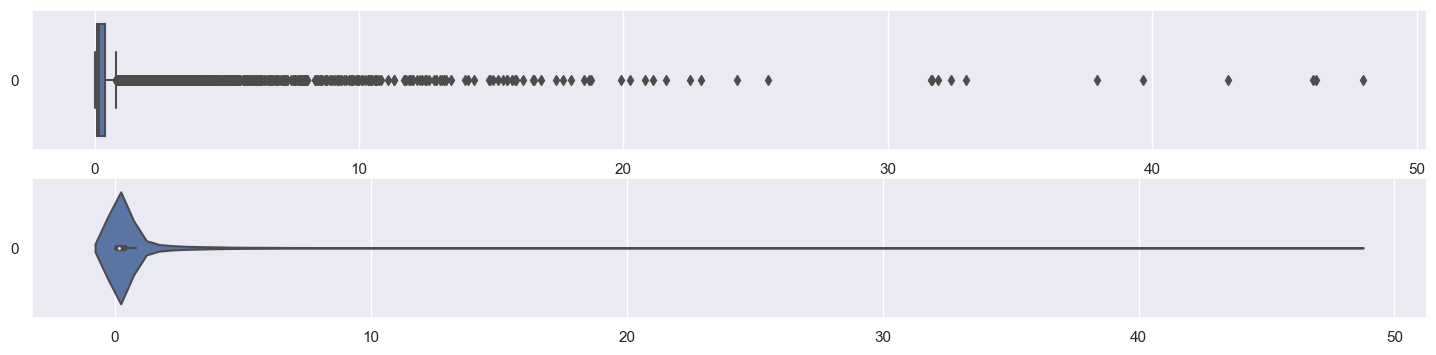

In [10]:
# boxplot and violin plot of cardmarket_price after removal of empty values and values above 100
f, axes = plt.subplots(2, 1, figsize=(18, 4))
sb.boxplot(data = yugioh_data['cardmarket_price'], orient = "h", ax = axes[0])
sb.violinplot(data = yugioh_data['cardmarket_price'], orient = "h", ax = axes[1])

### Using logarithm to combat skew
Apply method to combat skewness in price data. (most prices are a dollar and below) <br>
- Multiply 100 to convert price to integer values
- Apply a logarithmic transformation to the data

In [11]:
### 2 Methods to prepare data for Logarithm
# Increment values by 1
#yugioh_data["cardmarket_price"] = yugioh_data["cardmarket_price"] + 1
#yugioh_data['cardmarket_price'].describe()

# Convert data to integer values by * 100
#yugioh_data["cardmarket_price"] = yugioh_data["cardmarket_price"] * 100
#yugioh_data['cardmarket_price'].describe()

#Apply a logarithmic transformation to the data
#yugioh_data['cardmarket_price'] = np.log(yugioh_data["cardmarket_price"]) 

# Display plots after logaritmic skew management
#f, axes = plt.subplots(2, 1, figsize=(18, 4))
#sb.boxplot(data = yugioh_data['cardmarket_price'], orient = "h", ax = axes[0])
#sb.violinplot(data = yugioh_data['cardmarket_price'], orient = "h", ax = axes[1])

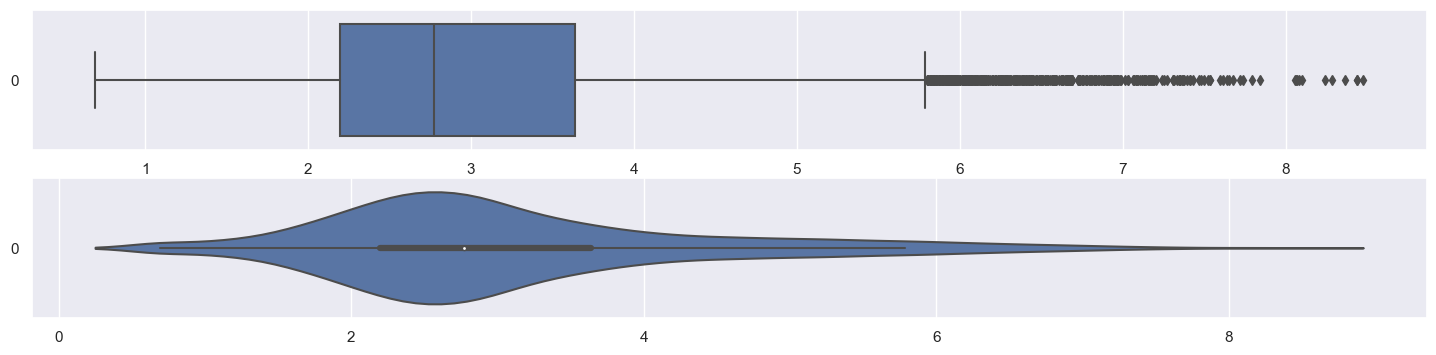

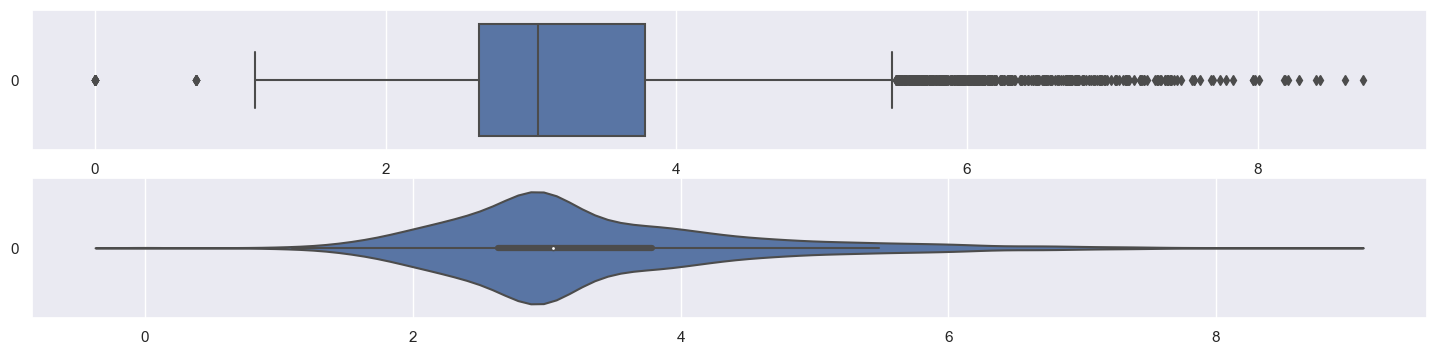

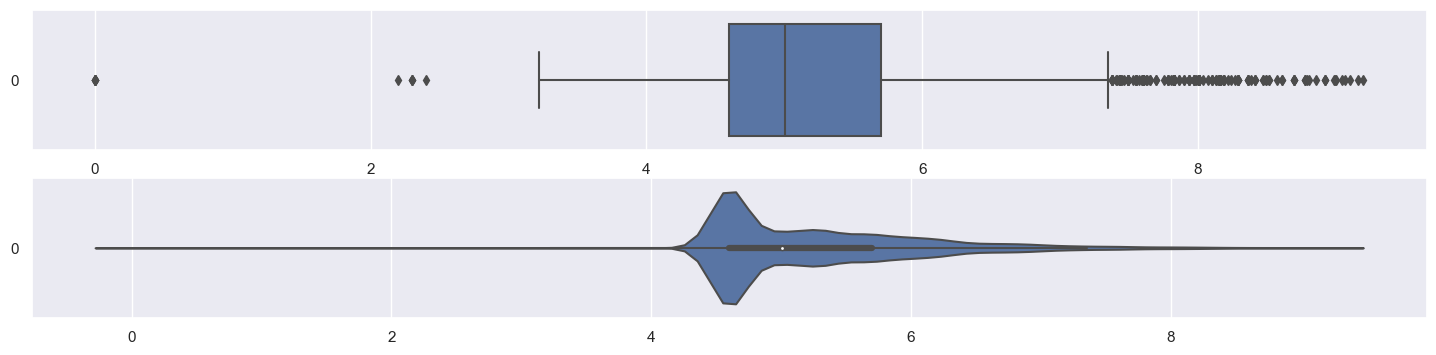

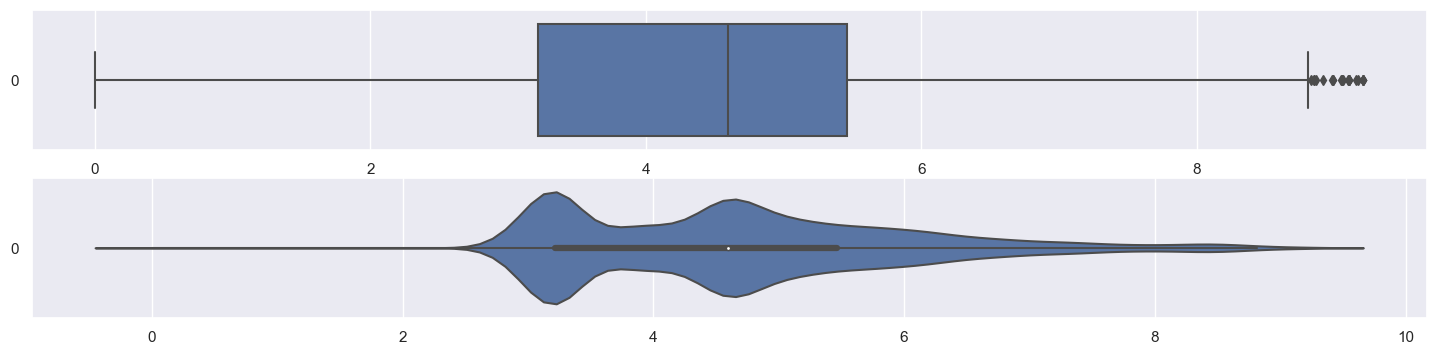

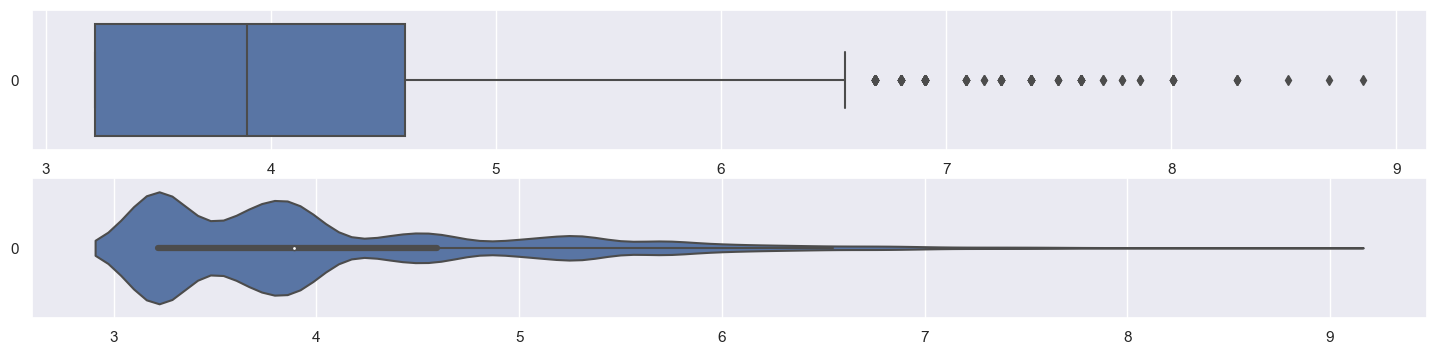

In [12]:
price_columns = ['cardmarket_price', 'tcgplayer_price', 'ebay_price', 'amazon_price', 'coolstuffinc_price']
for var in price_columns:
    # Convert data to integer values by * 100
    yugioh_data[var] = yugioh_data[var] * 100
    yugioh_data[var].describe()

    # Apply a logarithmic transformation to the data
    yugioh_data[var] = np.log(yugioh_data[var]) 
    
    f, axes = plt.subplots(2, 1, figsize=(18, 4))
    sb.boxplot(data = yugioh_data[var], orient = "h", ax = axes[0])
    sb.violinplot(data = yugioh_data[var], orient = "h", ax = axes[1])


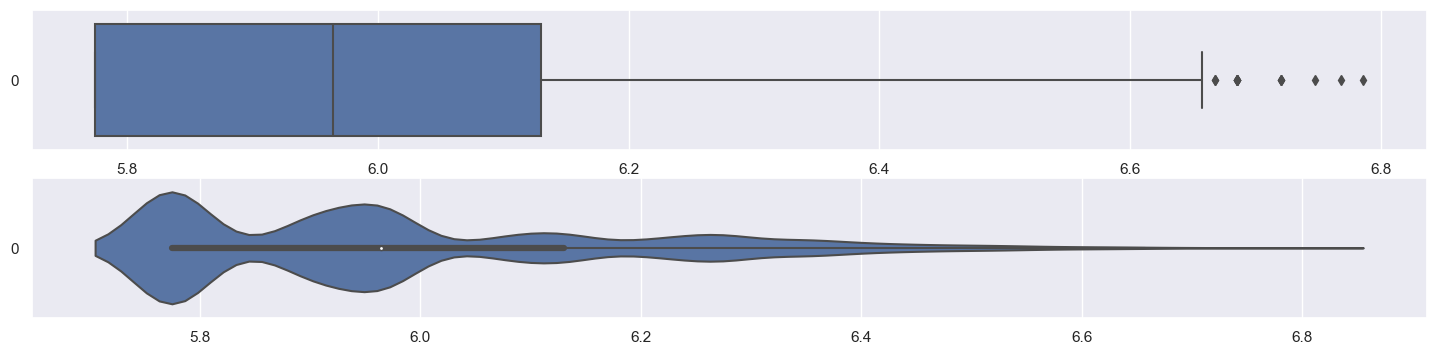

In [13]:
price_columns = ['coolstuffinc_price']
for var in price_columns:
    # Convert data to integer values by * 100
    yugioh_data[var] = yugioh_data[var] * 100
    yugioh_data[var].describe()

    #Apply a logarithmic transformation to the data
    yugioh_data[var] = np.log(yugioh_data[var]) 
    
    f, axes = plt.subplots(2, 1, figsize=(18, 4))
    sb.boxplot(data = yugioh_data[var], orient = "h", ax = axes[0])
    sb.violinplot(data = yugioh_data[var], orient = "h", ax = axes[1])


### Separate "Level" into level ranges and bins
Different level ranges requires different number of tribute monsters
- Level 1 to 4 => 0 tribute
- Level 5 to 6 => 1 tribute
- Level 7 to 12 => 2 tribute

In [14]:
# Define the bins for the level ranges
bins = [0.5, 4.0, 6.0, float('inf')]  

# Define the labels for the level ranges
labels = ['0', '1', '2']

# Create a new column 'tribute' to store the bucketed groups
yugioh_data['tribute'] = pd.cut(yugioh_data['level'], bins=bins, labels=labels, right=True)
# If right==True (the default), then the bins [1.0, 4.0, 7.0, float('inf')] indicate (0.5,4.0], (4.0,6], (6,inf].
# If right==False, bins will be the inbetween values, (1,2), (2,3), (3,4).

tribute0 = yugioh_data[yugioh_data['level'].between(0.5, 4.5)]
tribute1 = yugioh_data[yugioh_data['level'].between(4.5, 6.5)]
tribute2 = yugioh_data[yugioh_data['level'] >= 7]

# Display the new column
yugioh_data[['name','level','tribute']].head(10)

name  level tribute
0                3-Hump Lacooda    3.0       0
2     4-Starred Ladybug of Doom    3.0       0
3                7 Colored Fish    4.0       0
4              8-Claws Scorpion    2.0       0
5             A Cat of Ill Omen    2.0       0
6              A Man with Wdjat    4.0       0
7                A-Assault Core    4.0       0
8    A-Team: Trap Disposal Unit    2.0       0
9   A-to-Z-Dragon Buster Cannon   10.0       2
10                  A/D Changer    1.0       0

### Separate variables into binary categories for binary classification
- `sacrifice` => 1 if sacrificed required for monster (level 5 and above)
- `effect` => 1 if monster has effect (card type is not normal monster)
- `ban` => 1 if card is banned in a format (banned has a value)

In [15]:
### sacrifice column
yugioh_data['sacrifice'] = yugioh_data['level']
yugioh_data.loc[yugioh_data['level'] >= 5, 'sacrifice'] = 1
yugioh_data.loc[yugioh_data['level'] < 5, 'sacrifice'] = 0

# set column to Int64 from Float64
yugioh_data['sacrifice'] = pd.to_numeric(yugioh_data['sacrifice']).astype('Int64')

yugioh_data[['sacrifice','level','name']].head()

sacrifice  level                       name
0          0    3.0             3-Hump Lacooda
2          0    3.0  4-Starred Ladybug of Doom
3          0    4.0             7 Colored Fish
4          0    2.0           8-Claws Scorpion
5          0    2.0          A Cat of Ill Omen

In [16]:
### effect column
yugioh_data['effect'] = yugioh_data['type']
yugioh_data.loc[yugioh_data['type'] != 'Normal Monster', 'effect'] = 1
yugioh_data.loc[yugioh_data['type'] == 'Normal Monster', 'effect'] = 0

# set column to Int64 from Float64
yugioh_data['effect'] = pd.to_numeric(yugioh_data['effect']).astype('Int64')

yugioh_data[['effect','type','name']].head()

effect                 type                       name
0       1       Effect Monster             3-Hump Lacooda
2       1  Flip Effect Monster  4-Starred Ladybug of Doom
3       0       Normal Monster             7 Colored Fish
4       1       Effect Monster           8-Claws Scorpion
5       1  Flip Effect Monster          A Cat of Ill Omen

In [51]:
### ban column
yugioh_data['ban'] = yugioh_data['banlist_info']
yugioh_data['ban'] = yugioh_data['ban'].fillna(0)
yugioh_data.loc[yugioh_data['ban'] != 0, 'ban'] = 1

# set column to Int64 from Float64
yugioh_data['ban'] = pd.to_numeric(yugioh_data['ban']).astype('Int64')

yugioh_data[['ban','banlist_info','name']].head()


#yugioh_data.loc[(yugioh_data['ban'] == 1)]

#yugioh_data[['ban']].value_counts()


ban banlist_info                       name
0    0          NaN             3-Hump Lacooda
2    0          NaN  4-Starred Ladybug of Doom
3    0          NaN             7 Colored Fish
4    0          NaN           8-Claws Scorpion
5    0          NaN          A Cat of Ill Omen

# EDA OF NUMERIC VALUES


### Generating Additional Numerical Columns

In [18]:
# Generate New Numerical Columns
yugioh_data['atk+def'] = yugioh_data.loc[:,['atk','def']].sum(axis=1)
yugioh_data['atkSq'] = yugioh_data['atk'] * yugioh_data['atk']
yugioh_data['defSq'] = yugioh_data['def'] * yugioh_data['def']
yugioh_data['atkSq+defSq'] = yugioh_data['atkSq'] + yugioh_data['defSq']

# Describe all numerical columns present now
price_columns = ['cardmarket_price', 'tcgplayer_price', 'ebay_price', 'amazon_price', 'coolstuffinc_price', 'avg_price']
numericalColumns = ['atk', 'def', 'level']
newNumericalColumns = ['atk+def', 'atkSq', 'defSq', 'atkSq+defSq']

numericalColumns.extend(price_columns)
numericalColumns.extend(newNumericalColumns)

In [19]:
# Extract numeric data variables
yugioh_numerical_data = pd.DataFrame(yugioh_data[numericalColumns])

# Summary Statistics for all Variables
yugioh_numerical_data.describe().round(2)

atk      def    level  cardmarket_price  tcgplayer_price  \
count  7390.00  7043.00  7043.00           7390.00          7390.00   
mean   1482.03  1250.44     4.57              3.08             3.28   
std     937.39   860.75     2.35              1.32             1.11   
min       0.00     0.00     0.00              0.69             0.00   
25%     800.00   600.00     3.00              2.20             2.64   
50%    1500.00  1200.00     4.00              2.77             3.04   
75%    2100.00  1900.00     6.00              3.64             3.78   
max    5000.00  5000.00    13.00              8.48             8.73   

       ebay_price  amazon_price  coolstuffinc_price  avg_price   atk+def  \
count     7390.00       7390.00             7390.00    7390.00   7390.00   
mean         5.25          4.68                5.98       1.83   2673.75   
std          0.84          1.34                0.21       3.17   1535.55   
min          0.00          0.00                5.77       0.13      0.00   
25%          4.60          3.22                5.77       0.47   1700.00   
50%          5.00          4.60                5.96       0.78   2600.00   
75%          5.70          5.46                6.13       1.66   3600.00   
max          9.20          9.21                6.79      57.13  10000.00   

             atkSq        defSq  atkSq+defSq  
count      7390.00      7043.00      7043.00  
mean    3074988.54   2304392.66   5356814.26  
std     3165288.54   2636462.92   5132441.34  
min           0.00         0.00         0.00  
25%      640000.00    360000.00   2000000.00  
50%     2250000.00   1440000.00   4000000.00  
75%     4410000.00   3610000.00   7322500.00  
max    25000000.00  25000000.00  50000000.00

In [20]:
yugioh_data[numericalColumns].head()

atk     def  level  cardmarket_price  tcgplayer_price  ebay_price  \
0   500.0  1500.0    3.0          2.772589         2.772589    4.605170   
2   800.0  1200.0    3.0          2.484907         1.609438    4.595120   
3  1800.0   800.0    4.0          1.791759         2.772589    5.293305   
4   300.0   200.0    2.0          2.397895         3.091042    4.595120   
5   500.0   300.0    2.0          4.234107         5.170484    5.988961   

   amazon_price  coolstuffinc_price  avg_price  atk+def      atkSq      defSq  \
0      3.218876            5.774202      0.364   2000.0   250000.0  2250000.0   
2      4.595120            5.774202      0.480   2000.0   640000.0  1440000.0   
3      5.624018            5.903606      1.074   2600.0  3240000.0   640000.0   
4      2.995732            5.774202      0.354    500.0    90000.0    40000.0   
5      6.107023            6.130165      2.384    800.0   250000.0    90000.0   

   atkSq+defSq  
0    2500000.0  
2    2080000.0  
3    3880000.0  
4     130000.0  
5     340000.0

### Separate "Level" into level ranges and bins
- Level 1 to 4 => 0 tribute
- Level 5 to 6 => 1 tribute
- Level 7 to inf => 2 tribute

In [21]:
# Define the bins for the level ranges
bins = [0.5, 4.0, 6.0, float('inf')]  

# Define the labels for the level ranges
labels = ['0', '1', '2']

# Create a new column 'tribute' to store the bucketed groups
yugioh_data['tribute'] = pd.cut(yugioh_data['level'], bins=bins, labels=labels, right=True)
# If right==True (the default), then the bins [1.0, 4.0, 7.0, float('inf')] indicate (0.5,4.0], (4.0,6], (6,inf].
# If right==False, bins will be the inbetween values, (1,2), (2,3), (3,4).

tribute0 = yugioh_data[yugioh_data['level'].between(0.5, 4.5)]
tribute1 = yugioh_data[yugioh_data['level'].between(4.5, 6.5)]
tribute2 = yugioh_data[yugioh_data['level'] >= 7]

# Display the new column
yugioh_data[['name','level','tribute']].head(10)

name  level tribute
0                3-Hump Lacooda    3.0       0
2     4-Starred Ladybug of Doom    3.0       0
3                7 Colored Fish    4.0       0
4              8-Claws Scorpion    2.0       0
5             A Cat of Ill Omen    2.0       0
6              A Man with Wdjat    4.0       0
7                A-Assault Core    4.0       0
8    A-Team: Trap Disposal Unit    2.0       0
9   A-to-Z-Dragon Buster Cannon   10.0       2
10                  A/D Changer    1.0       0

In [22]:
yugioh_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7390 entries, 0 to 8223
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               7390 non-null   int64   
 1   id                  7390 non-null   int64   
 2   name                7390 non-null   object  
 3   type                7390 non-null   object  
 4   frameType           7390 non-null   object  
 5   race                7390 non-null   object  
 6   archetype           4647 non-null   object  
 7   card_sets           7390 non-null   object  
 8   card_prices         7390 non-null   object  
 9   atk                 7390 non-null   float64 
 10  def                 7043 non-null   float64 
 11  level               7043 non-null   float64 
 12  attribute           7390 non-null   object  
 13  banlist_info        160 non-null    object  
 14  cardmarket_price    7390 non-null   float64 
 15  tcgplayer_price     7390 non-null   float64

In [23]:
# Draw the distributions of all variables len(numericalColumns)
#f, axes = plt.subplots(len(numericalColumns), 3, figsize=(18, 24))
#
#yugioh_numerical_data = yugioh_numerical_data.reset_index(drop=True)
#
#count = 0
#for var in yugioh_numerical_data:
#    sb.boxplot(data = yugioh_numerical_data[var], orient = "h", ax = axes[count,0])
#    sb.histplot(data = yugioh_numerical_data[var], ax = axes[count,1])
#    sb.violinplot(data = yugioh_numerical_data[var], orient = "h", ax = axes[count,2])
#    count += 1

### Correlation Matrix of Numerical Variables

<Axes: >

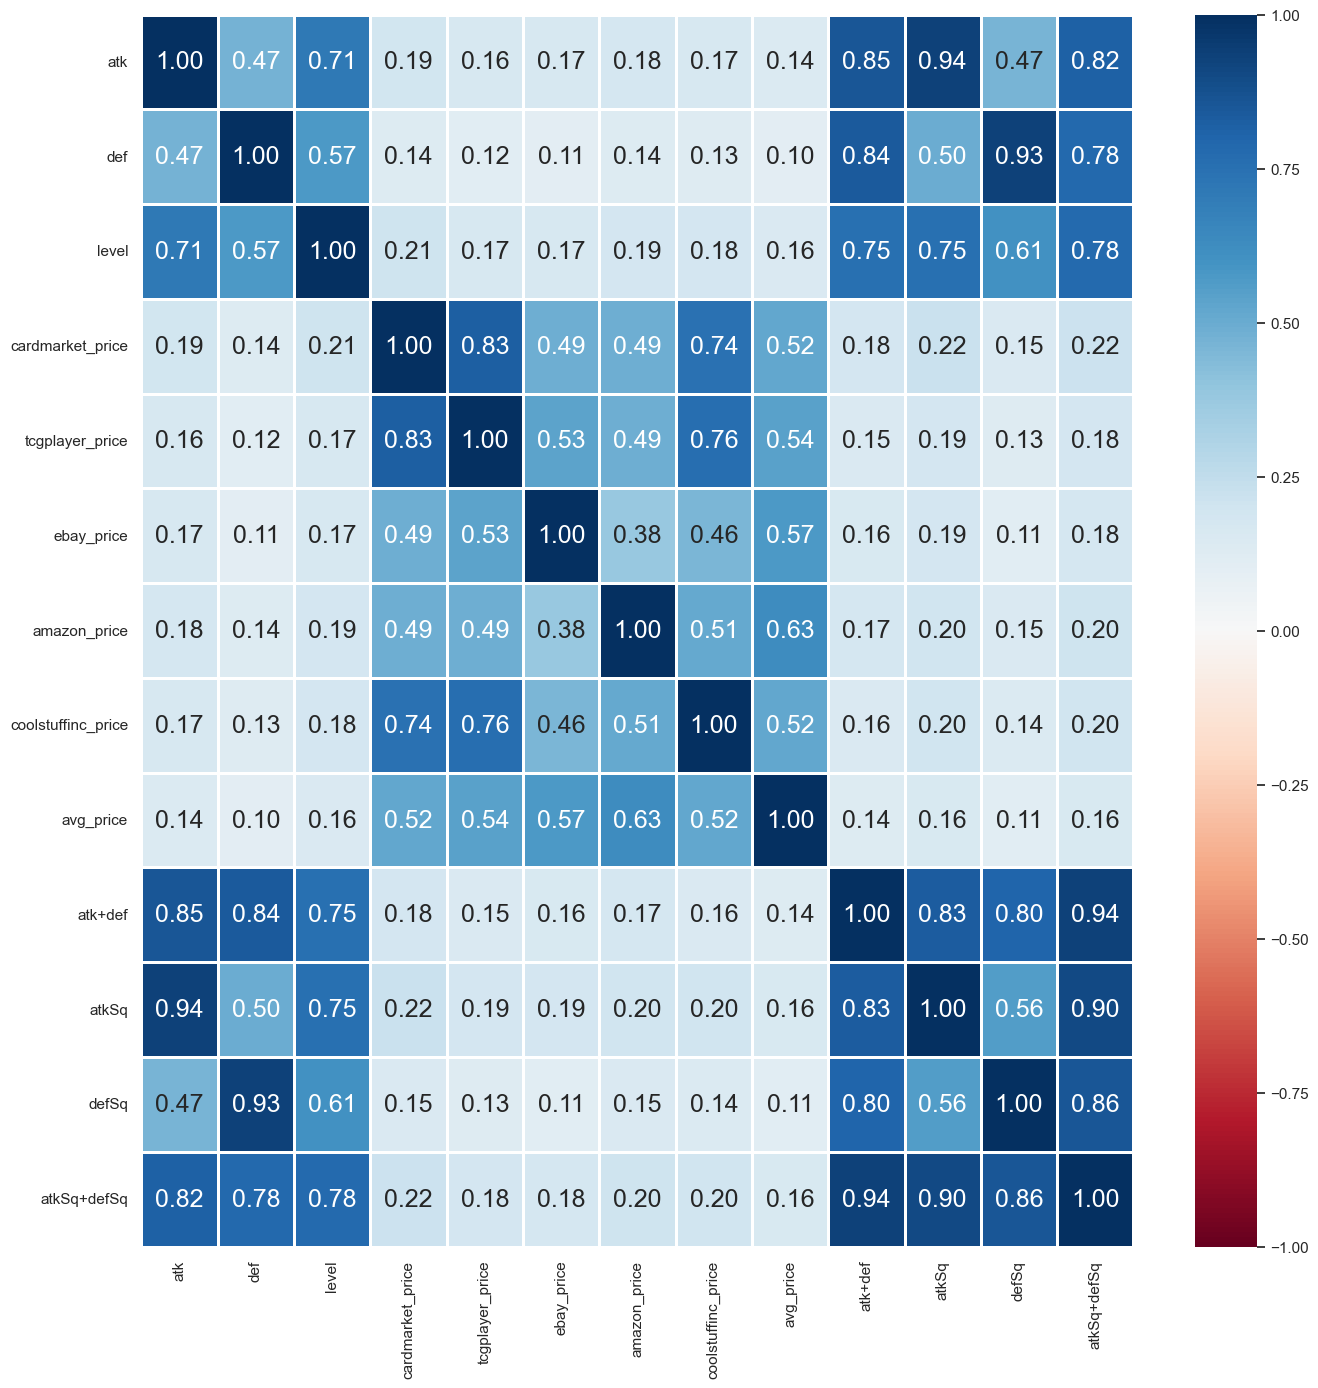

In [24]:
# Correlation Matrix
#print(yugioh_numerical_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(16, 16))
sb.heatmap(yugioh_numerical_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Realisation for linear regression / Analysis of correlation matrix
Despite measures taken to 

In [25]:
yugioh_numerical_data.head()

atk     def  level  cardmarket_price  tcgplayer_price  ebay_price  \
0   500.0  1500.0    3.0          2.772589         2.772589    4.605170   
2   800.0  1200.0    3.0          2.484907         1.609438    4.595120   
3  1800.0   800.0    4.0          1.791759         2.772589    5.293305   
4   300.0   200.0    2.0          2.397895         3.091042    4.595120   
5   500.0   300.0    2.0          4.234107         5.170484    5.988961   

   amazon_price  coolstuffinc_price  avg_price  atk+def      atkSq      defSq  \
0      3.218876            5.774202      0.364   2000.0   250000.0  2250000.0   
2      4.595120            5.774202      0.480   2000.0   640000.0  1440000.0   
3      5.624018            5.903606      1.074   2600.0  3240000.0   640000.0   
4      2.995732            5.774202      0.354    500.0    90000.0    40000.0   
5      6.107023            6.130165      2.384    800.0   250000.0    90000.0   

   atkSq+defSq  
0    2500000.0  
2    2080000.0  
3    3880000.0  
4     130000.0  
5     340000.0

In [26]:
yugioh_data.head()

index        id                       name                 type frameType  \
0     10  86988864             3-Hump Lacooda       Effect Monster    effect   
2     12  83994646  4-Starred Ladybug of Doom  Flip Effect Monster    effect   
3     14  23771716             7 Colored Fish       Normal Monster    normal   
4     16  14261867           8-Claws Scorpion       Effect Monster    effect   
5     17  24140059          A Cat of Ill Omen  Flip Effect Monster    effect   

     race archetype                                          card_sets  \
0   Beast       NaN  [{'set_name': 'Ancient Sanctuary', 'set_code':...   
2  Insect       NaN  [{'set_name': 'Dark Beginning 1', 'set_code': ...   
3    Fish       NaN  [{'set_name': 'Gold Series', 'set_code': 'GLD1...   
4  Insect       NaN  [{'set_name': 'Gold Series', 'set_code': 'GLD1...   
5   Beast       NaN  [{'set_name': 'Dark Revelation Volume 1', 'set...   

                                         card_prices     atk  ...  \
0  {'cardmarket_price': '0.16', 'tcgplayer_price'...   500.0  ...   
2  {'cardmarket_price': '0.12', 'tcgplayer_price'...   800.0  ...   
3  {'cardmarket_price': '0.06', 'tcgplayer_price'...  1800.0  ...   
4  {'cardmarket_price': '0.11', 'tcgplayer_price'...   300.0  ...   
5  {'cardmarket_price': '0.69', 'tcgplayer_price'...   500.0  ...   

   coolstuffinc_price  avg_price tribute sacrifice  effect  ban  atk+def  \
0            5.774202      0.364       0         0       1    0   2000.0   
2            5.774202      0.480       0         0       1    0   2000.0   
3            5.903606      1.074       0         0       0    0   2600.0   
4            5.774202      0.354       0         0       1    0    500.0   
5            6.130165      2.384       0         0       1    0    800.0   

       atkSq      defSq  atkSq+defSq  
0   250000.0  2250000.0    2500000.0  
2   640000.0  1440000.0    2080000.0  
3  3240000.0   640000.0    3880000.0  
4    90000.0    40000.0     130000.0  
5   250000.0    90000.0     340000.0  

[5 rows x 28 columns]

In [27]:
#yugioh_data_normalMonsters = yugioh_data[yugioh_data['type'].isin(['Normal Monster'])]

# Extract numeric data variables
#yugioh_numerical_data = pd.DataFrame(yugioh_data[numericalColumns])

yugioh_numerical_data_normalMonsters = yugioh_data.loc[yugioh_data['type'] == "Synchro Monster", numericalColumns]


#yugioh_data_effectMonsters = yugioh_data[yugioh_data['type'].isin(['Effect Monster'])]

yugioh_numerical_data_effectMonsters = yugioh_data.loc[yugioh_data['type'] == "Pendulum Effect Monster", numericalColumns]

<Axes: >

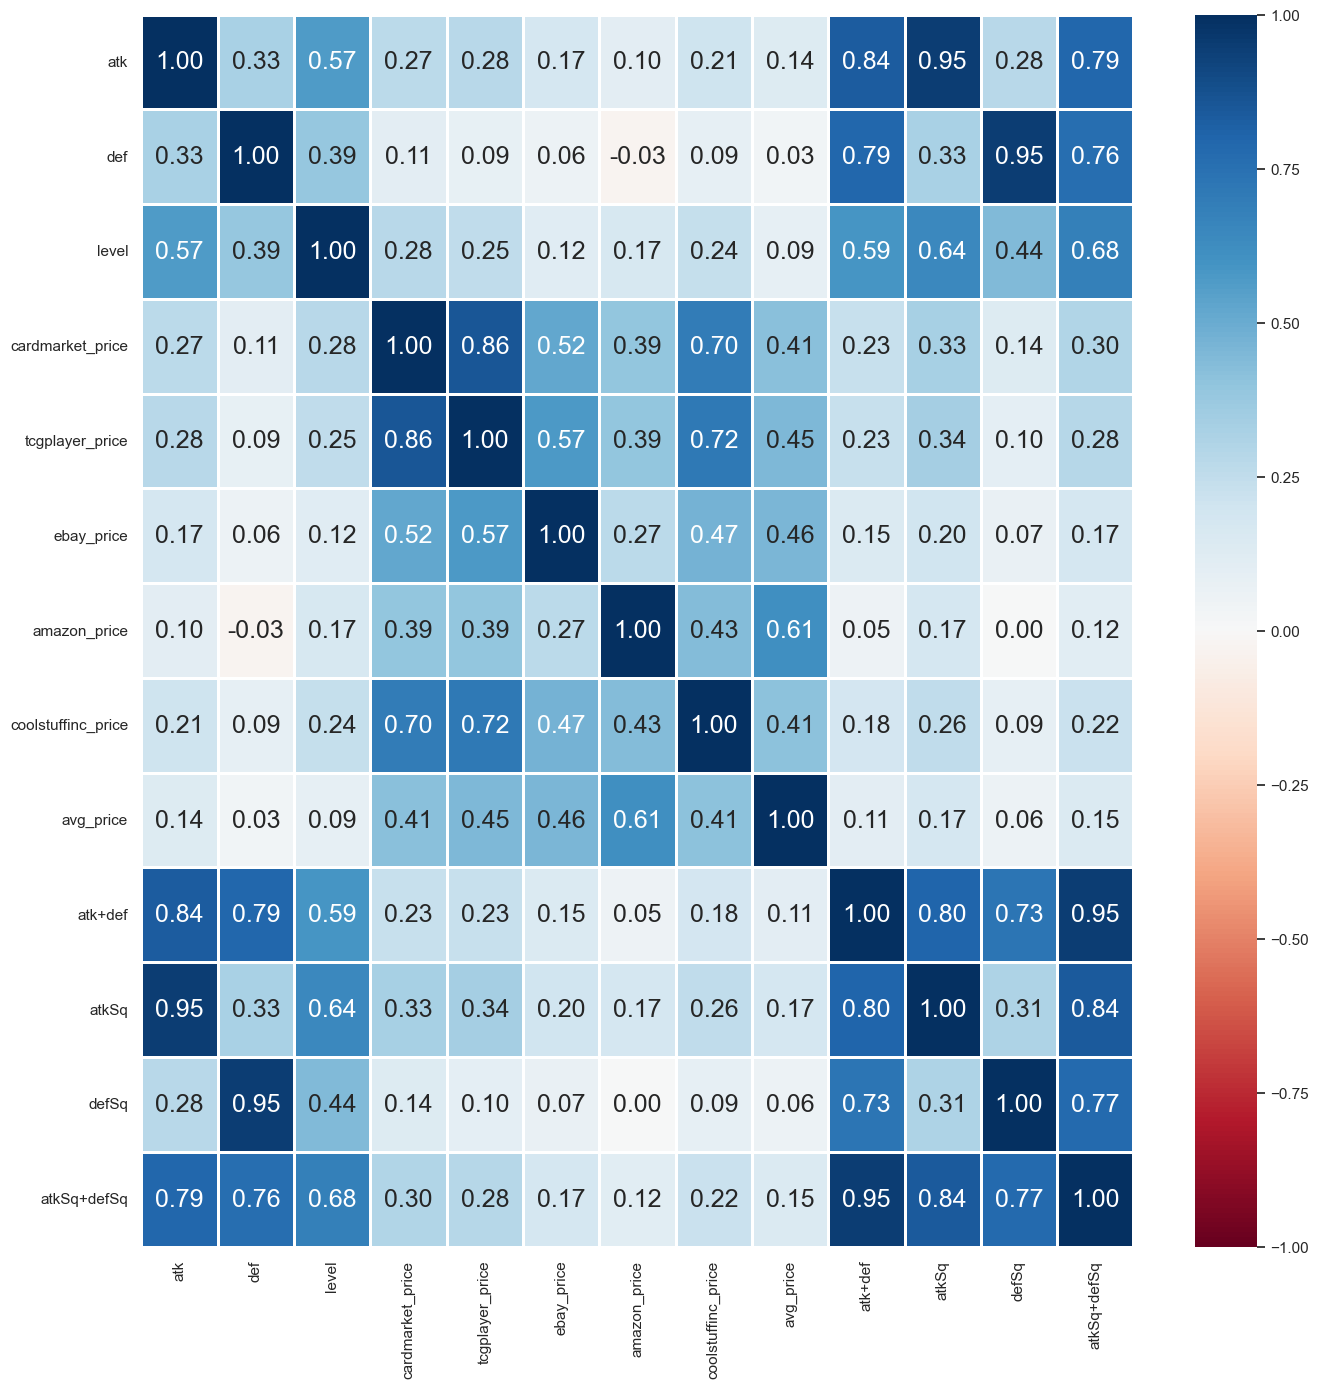

In [28]:
# Correlation Matrix
#print(yugioh_numerical_data.corr())

#yugioh_numerical_data_effectMonsters = yugioh_numerical_data[]

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(16, 16))
sb.heatmap(yugioh_numerical_data_effectMonsters.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<Axes: >

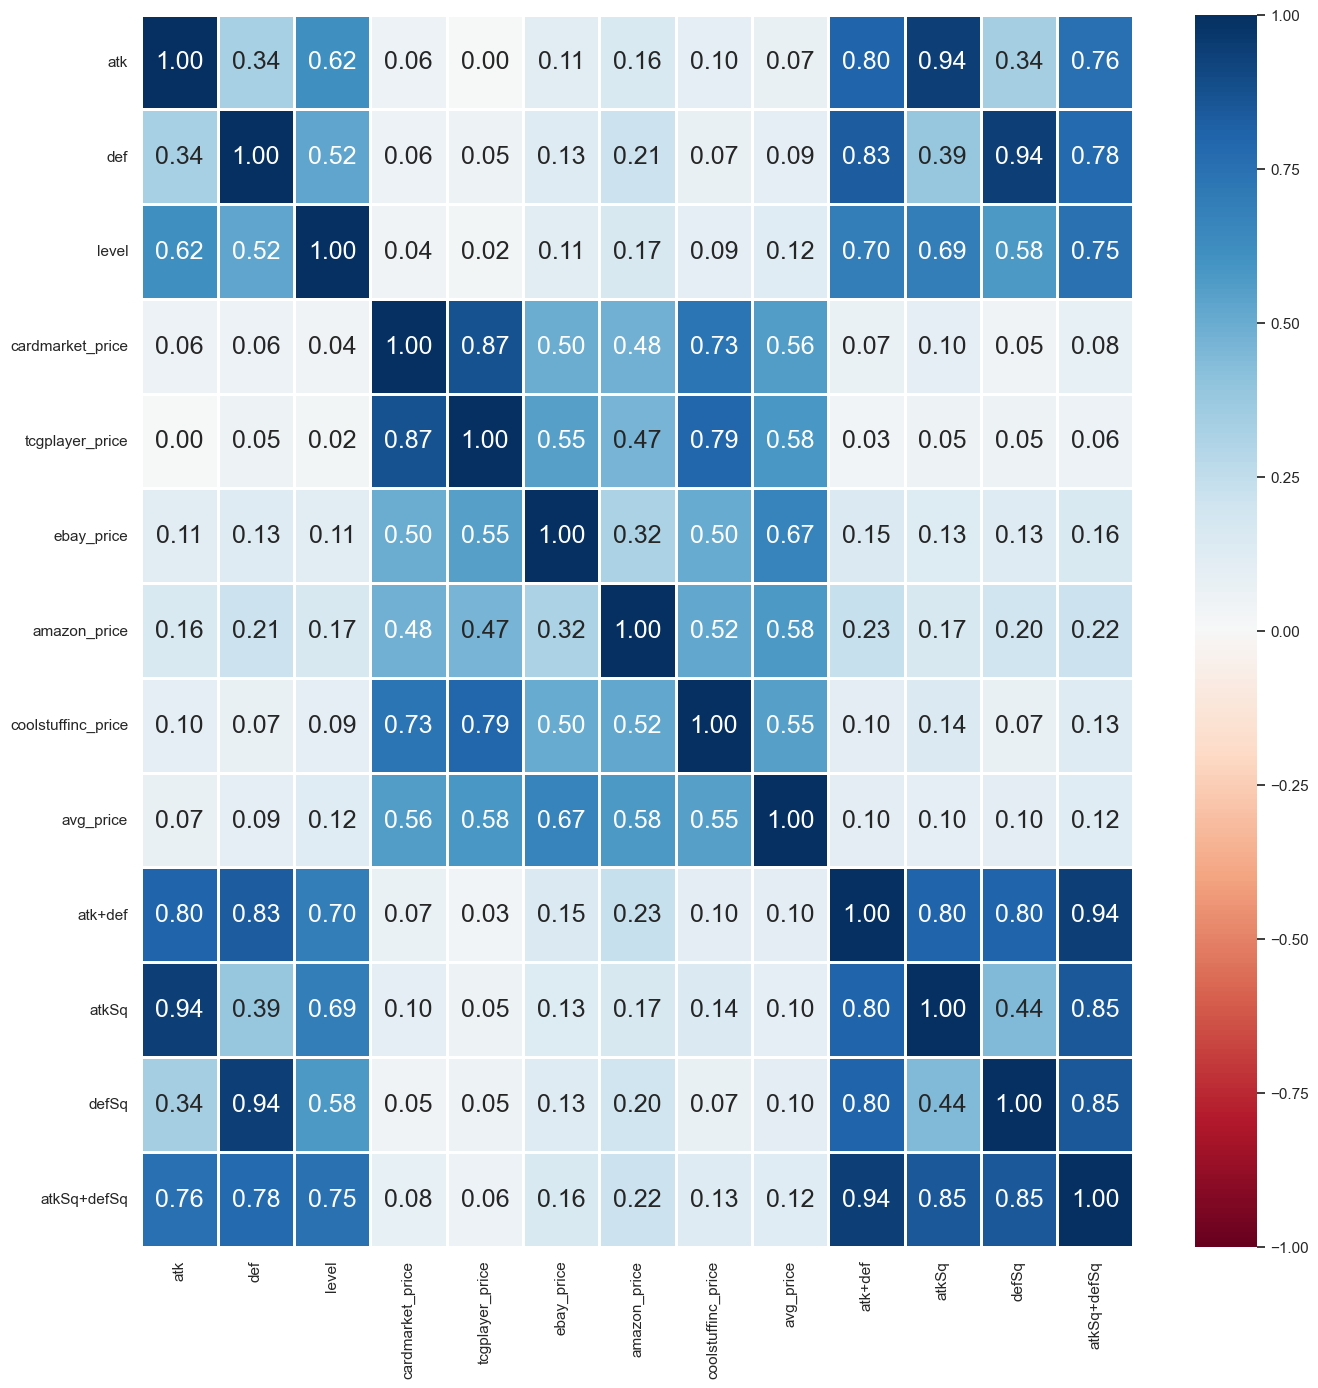

In [29]:
# Correlation Matrix
#print(yugioh_numerical_data.corr())

#yugioh_numerical_data_normalMonsters = yugioh_numerical_data[]

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(16, 16))
sb.heatmap(yugioh_numerical_data_normalMonsters.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

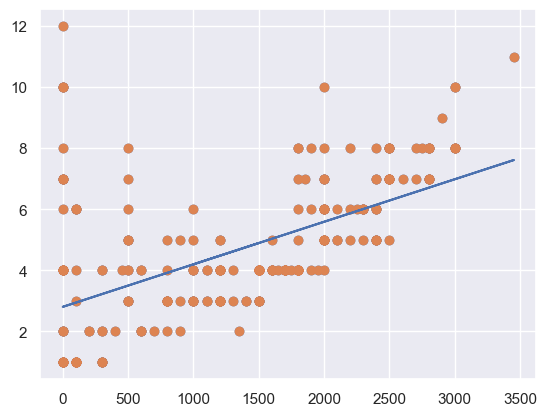

In [30]:
# Scatterplot of 

y = yugioh_numerical_data_effectMonsters["level"]
x = yugioh_numerical_data_effectMonsters["atk"]

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)  

plt.scatter(x, y)
plt.show()

#f = plt.figure(figsize=(16, 16))
#sb.heatmap(yugioh_numerical_data_normalMonsters.corr(), vmin = -1, vmax = 1, linewidths = 1,
#           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Linear Regresstion of Numerical Values

### Analysis of correlation coefficients
The columns with good correlation to `level` so far are `atk` `def` `atkSq` `defSq` `atkSq + defSq`.
Interestingly, the higest correlation to level, is actually `atkSq + defSq`. 
Which is better than both atk or def taken separately.
As the squares of the values have higher correlation than the values themselves, 
This suggests that higher absolute value of atk and def have a greater impact in prediciting level than just atk or def itself.

In [31]:
predictors = ["atk", "def", "atkSq", "defSq", "atkSq+defSq"]
predictors.append("name")
pd.DataFrame(yugioh_data[predictors]).head()

atk     def      atkSq      defSq  atkSq+defSq  \
0   500.0  1500.0   250000.0  2250000.0    2500000.0   
2   800.0  1200.0   640000.0  1440000.0    2080000.0   
3  1800.0   800.0  3240000.0   640000.0    3880000.0   
4   300.0   200.0    90000.0    40000.0     130000.0   
5   500.0   300.0   250000.0    90000.0     340000.0   

                        name  
0             3-Hump Lacooda  
2  4-Starred Ladybug of Doom  
3             7 Colored Fish  
4           8-Claws Scorpion  
5          A Cat of Ill Omen

### Handling NaN values for def
Link monster have NaN value for defence, for regression purposes we'll set their defence as 0

In [32]:
# Set NaN defence to 0.0
yugioh_data[predictors] = yugioh_data[predictors].replace(np.NaN, 0.00)


### Handling NaN values for level
Link monsters have NaN values for levels, for regression purposes we'll set their level as 0

In [33]:
yugioh_data[["level"]] = yugioh_data[["level"]].replace(np.NaN, 0.00)

#yugioh_data[["level","name"]][yugioh_data[["level","name"]].isnull().any(axis=1)]

In [34]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset
dataset = yugioh_numerical_data_effectMonsters

# Extract Response and Predictors
predictors = ["atkSq", "atkSq+defSq"]
reponse_variable = ["cardmarket_price"]

X = pd.DataFrame(dataset[predictors])
y = pd.DataFrame(dataset[reponse_variable])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X_train.shape)
print(y_train.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the training data and regression line.
#f = plt.figure(figsize=(16, 8))
#plt.scatter(X_train, y_train, color = "green")
##plt.scatter(X_test, y_test_pred, color = "red")
#plt.axline((0, linreg.intercept_.item()), slope=linreg.coef_.item(), label='by slope', linewidth=4, color='r')
#plt.show()

# Plot the test data and regression line.
#f = plt.figure(figsize=(16, 8))
#plt.scatter(X_test, y_test, color = "green")
#plt.scatter(X_test, y_test_pred, color = "red")
#plt.axline((0, linreg.intercept_.item()), slope=linreg.coef_.item(), label='by slope', linewidth=4, color='r')
#plt.show()

(193, 2)
(193, 1)
Intercept of Regression 	: b =  [2.2960128]
Coefficients of Regression 	: a =  [[1.33857971e-07 2.82149976e-08]]

    Predictors  Coefficients
0        atkSq  1.338580e-07
1  atkSq+defSq  2.821500e-08



### Conclusion of linear regression


In [35]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Prediction Accuracy (on Test Data)
print("Prediction Accuracy      \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13038860367120242
Mean Squared Error (MSE) 	: 1.3065435191589316

Prediction Accuracy      	Test Dataset
Explained Variance (R^2) 	: -0.08166323976780654
Mean Squared Error (MSE) 	: 0.851489197072074



# EDA of Categorical Values for Card Price
Using the following variables to predict card price on different platform

From the results, it was found that the categories alone is not conclusive to the price of the cards. The price range for all the categorical variables in the differen categories overlaps heavily and many are not consistent between platforms. This could be attributed to the fact that each card price varies on a combination of all the variables.

However, it was still found that `frameType` had more categorical variables that covers a more distinct range for card prices among all the differnt platform.
The highest priced `frameType` catgories are "xyz", "synchro" and "fusion".
The lowest priced `frameType` catgories are "normal_pendulum", "effect_pendulum" and effect"

Number Of tribute/level is also very consitent for all the card prices among all the differnt platform.With the higher level/tribute, the higher the price.

In [36]:
categories = ['level','tribute','race','attribute','type','frameType']
#categories = ['tribute','frameType']
price_columns = ['cardmarket_price', 'tcgplayer_price', 'ebay_price', 'amazon_price', 'coolstuffinc_price', 'avg_price']
yugioh_data_categorical = yugioh_data[categories+price_columns]

#yugioh_data_categorical = tribute0[categories+price_columns]
#yugioh_data_categorical = yugioh_data_categorical[(yugioh_data_categorical['frameType'] == "normal")]

for var in categories:
    print(yugioh_data_categorical[var].value_counts())
    #print("Number of categories: ", yugioh_data_categorical[var].value_counts().count())
    print()

level
4.0     2235
3.0     1042
8.0      614
2.0      602
1.0      577
6.0      566
5.0      545
7.0      425
0.0      353
10.0     226
9.0      130
12.0      47
11.0      27
13.0       1
Name: count, dtype: int64

tribute
0    4456
2    1470
1    1111
Name: count, dtype: int64

race
Warrior          962
Machine          850
Fiend            695
Dragon           625
Spellcaster      616
Fairy            468
Beast            345
Winged Beast     298
Cyberse          235
Rock             234
Aqua             225
Beast-Warrior    222
Zombie           222
Insect           221
Plant            213
Psychic          164
Reptile          157
Thunder          119
Dinosaur         118
Fish             117
Pyro             115
Wyrm              85
Sea Serpent       80
Divine-Beast       4
Name: count, dtype: int64

attribute
DARK      2056
EARTH     1719
LIGHT     1501
WATER      771
WIND       713
FIRE       626
DIVINE       4
Name: count, dtype: int64

type
Effect Monster                     42

cardmarket_price


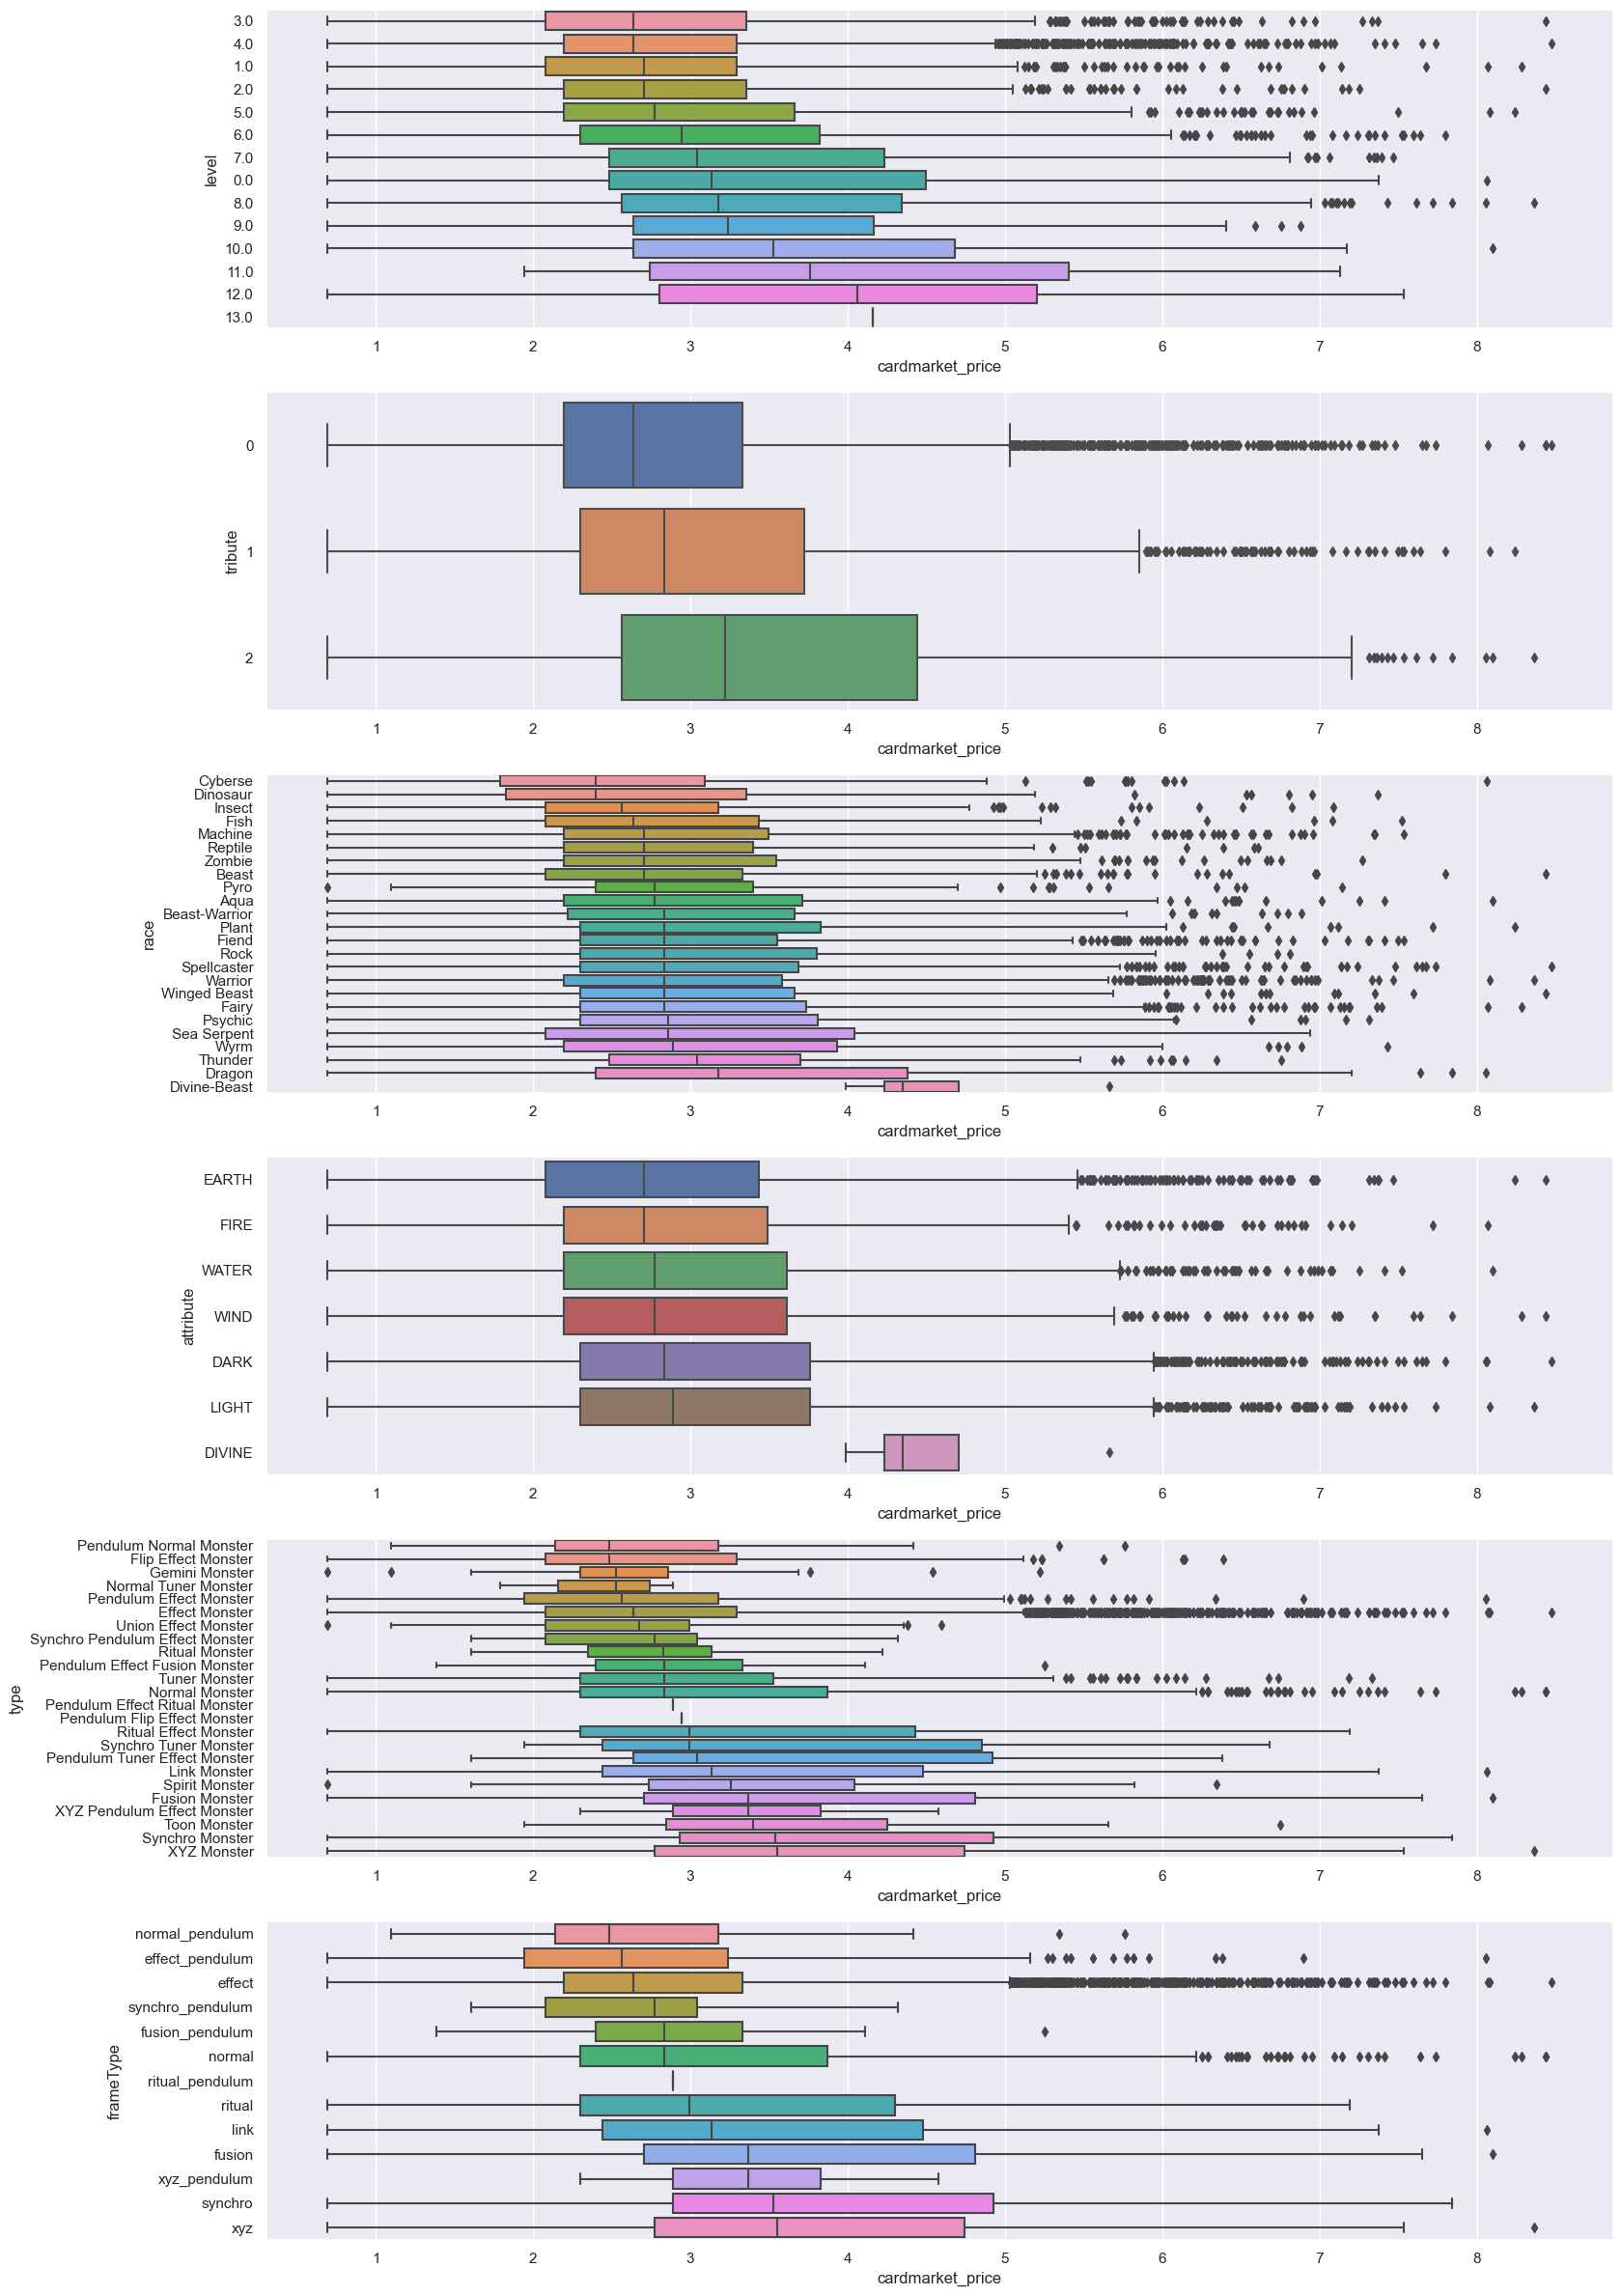

tcgplayer_price


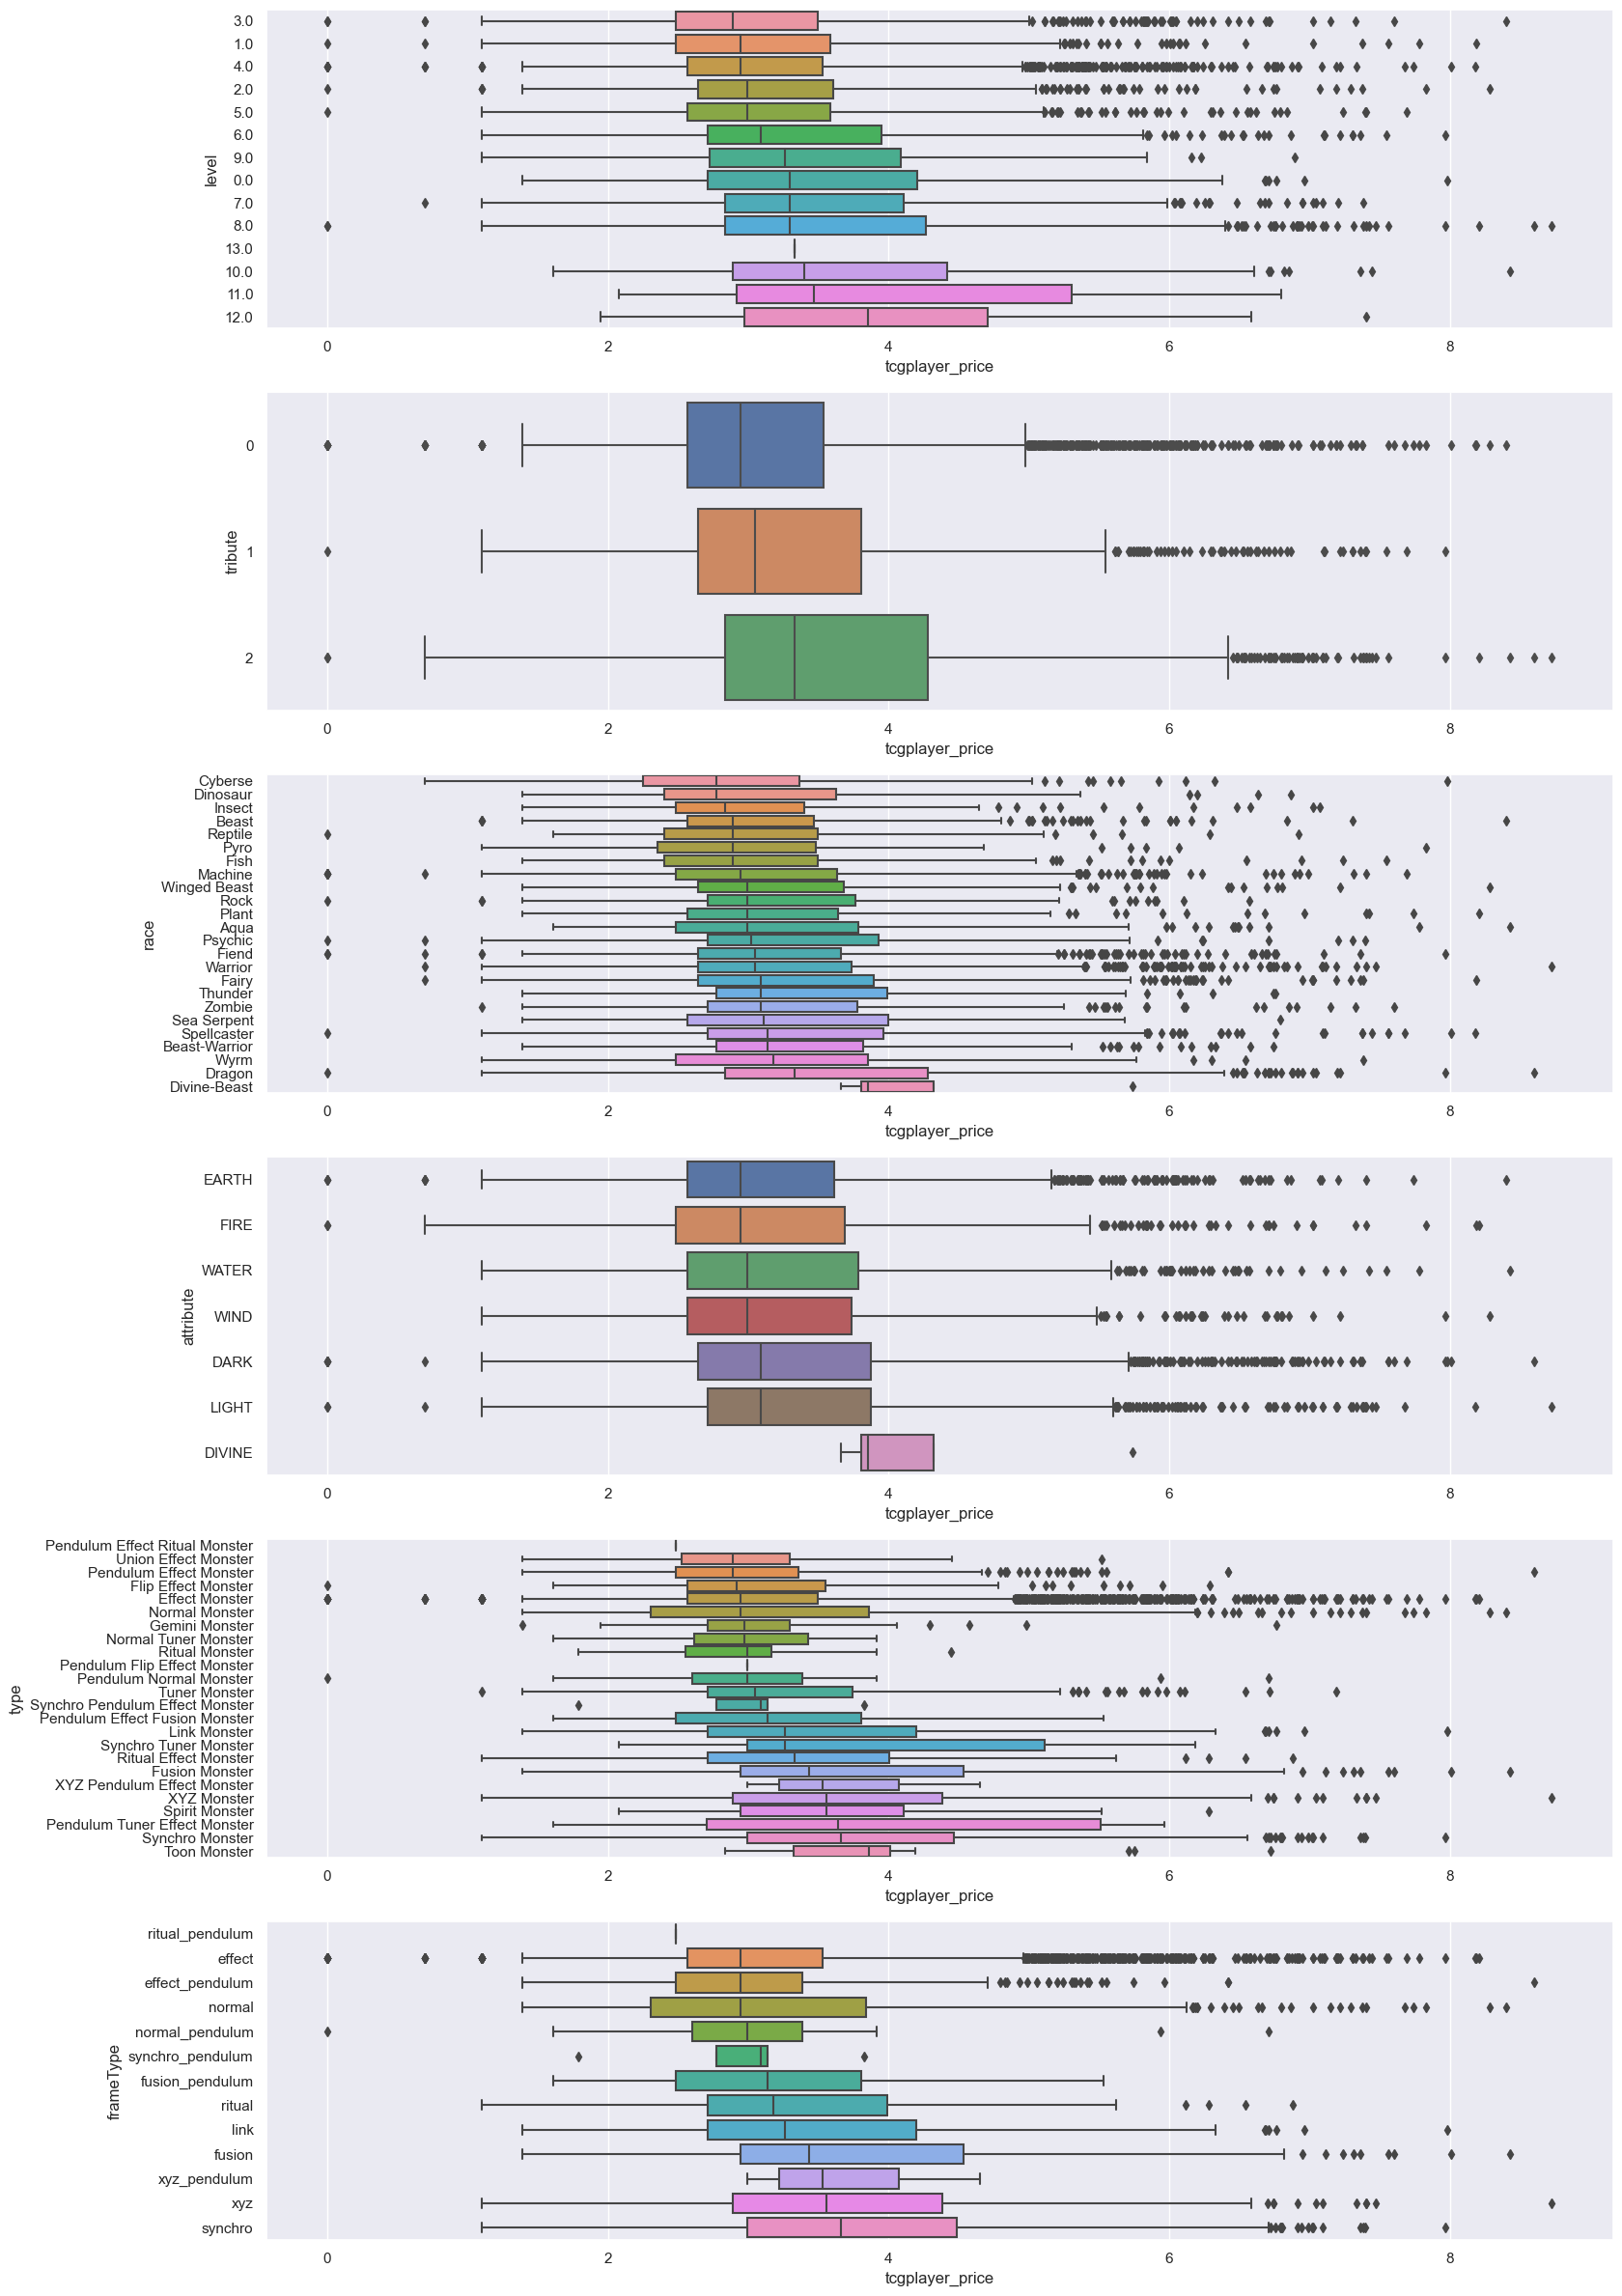

ebay_price


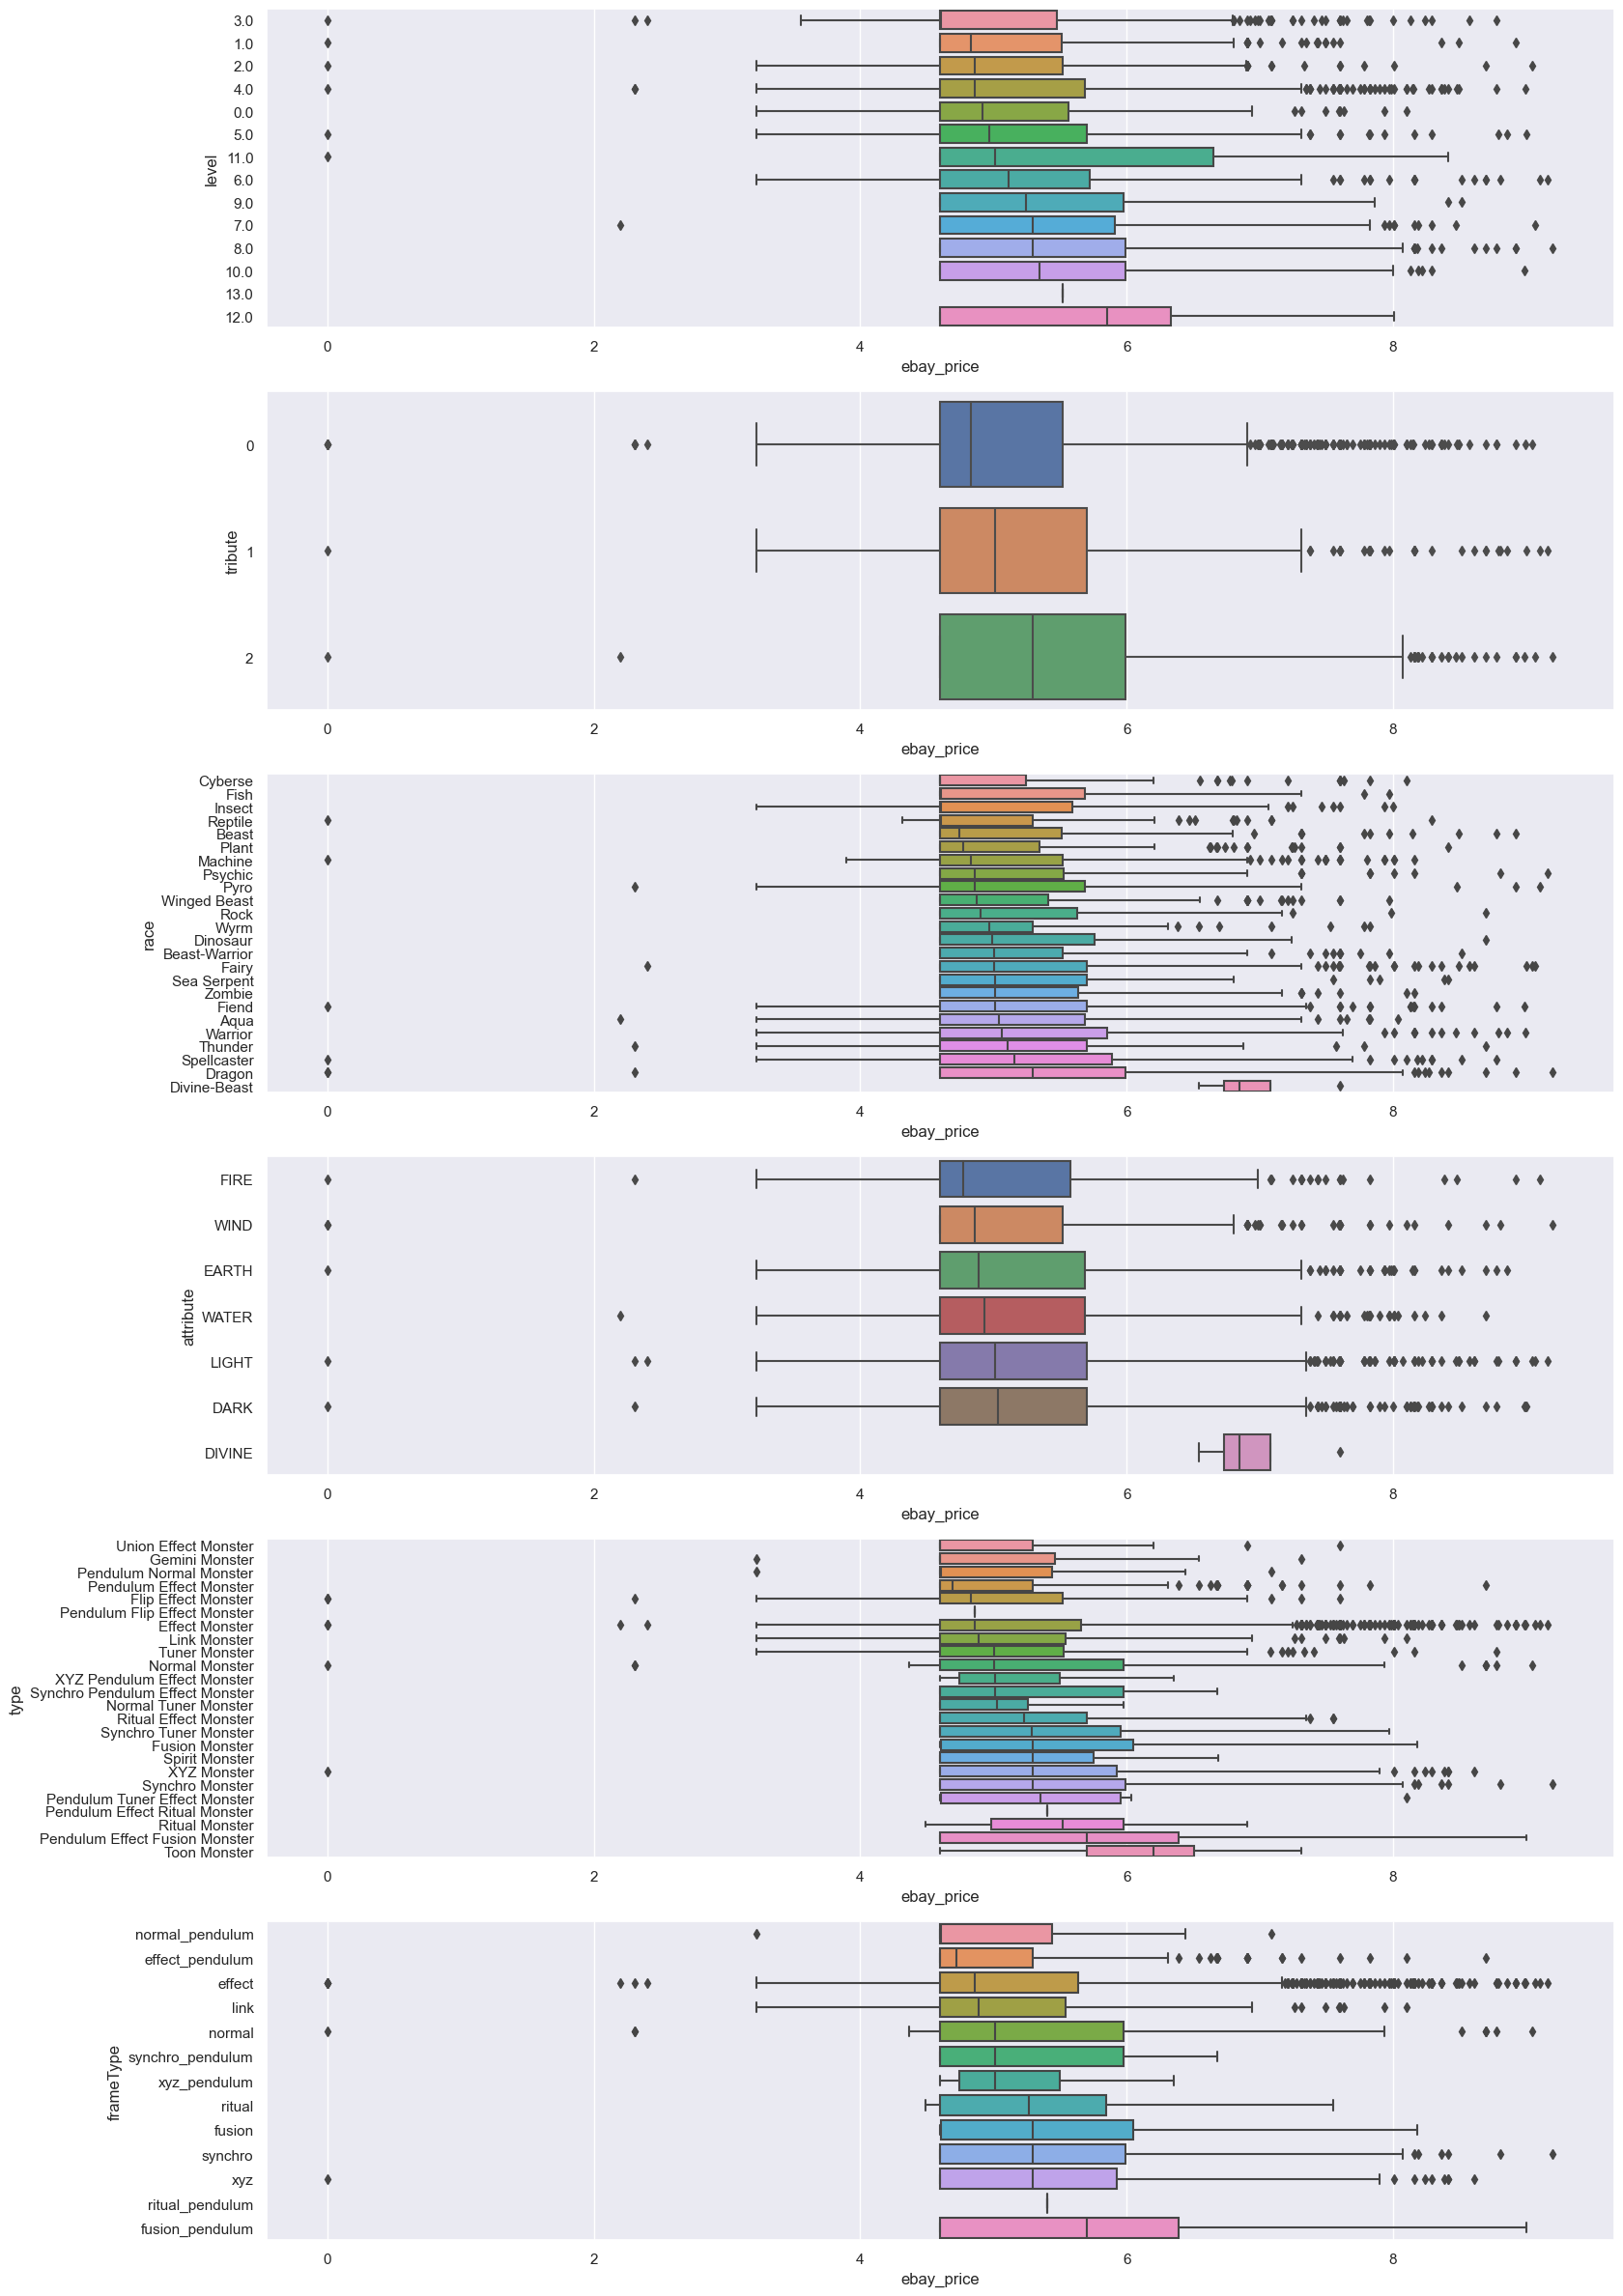

amazon_price


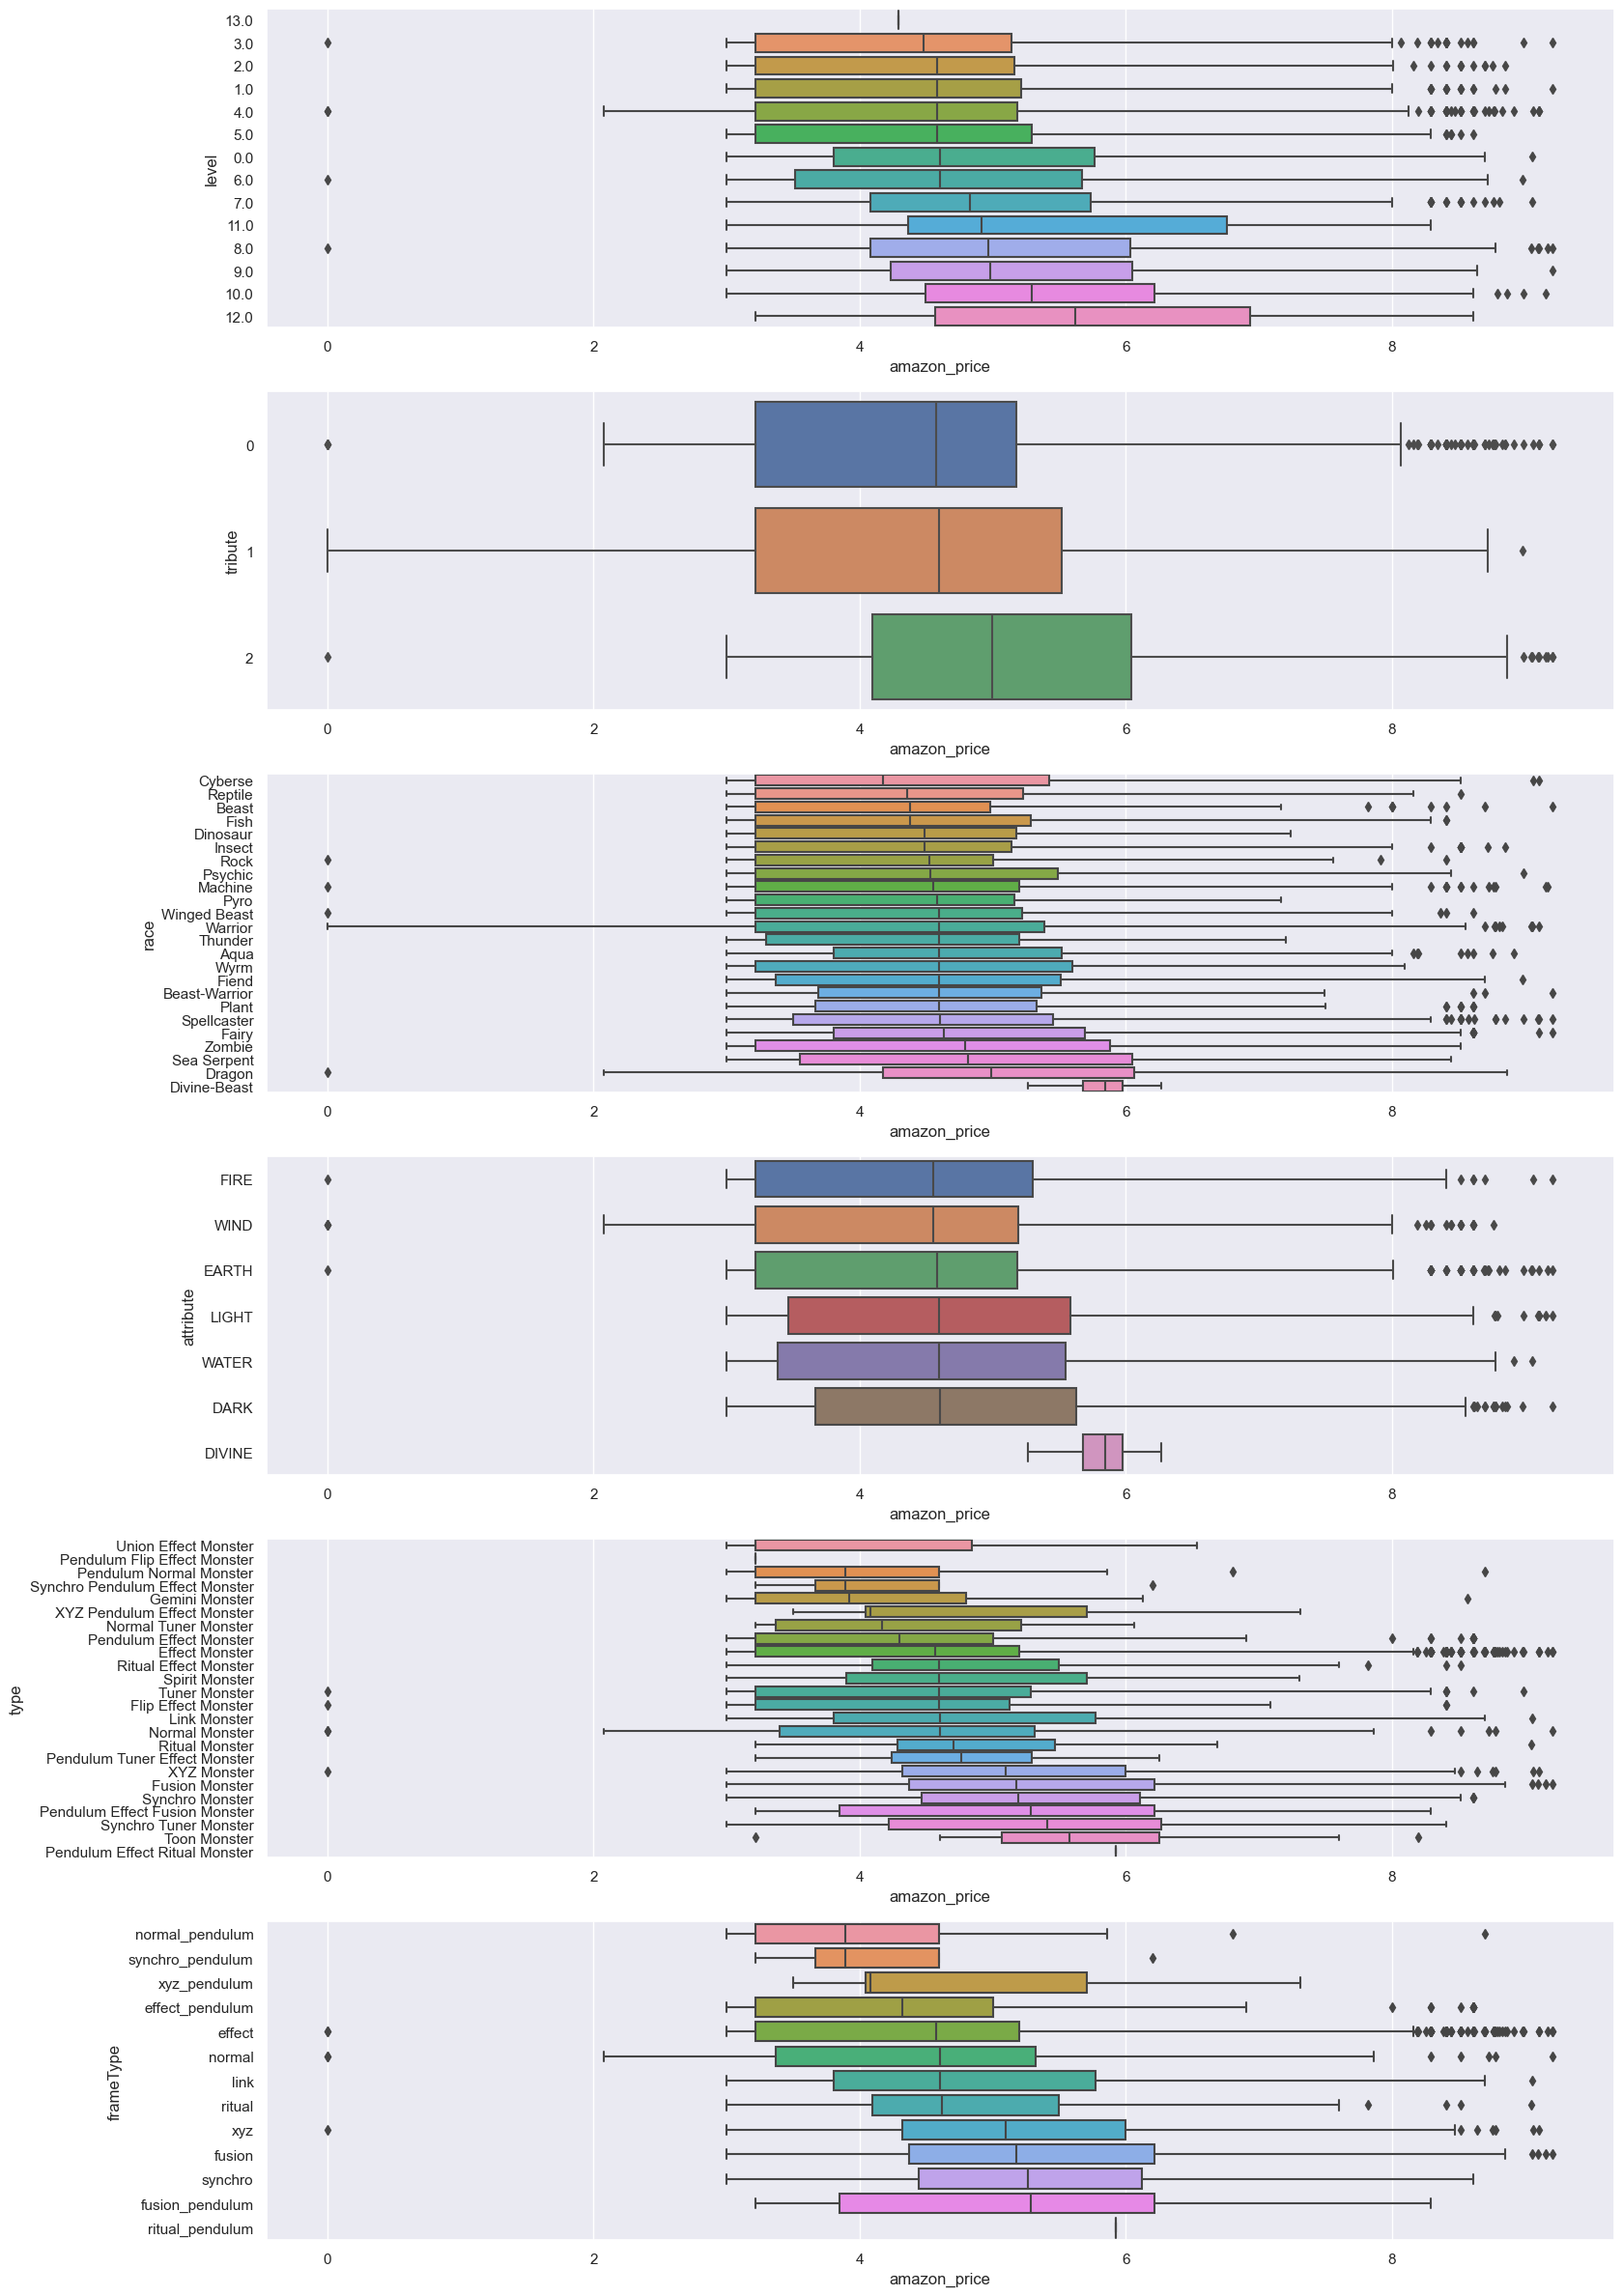

coolstuffinc_price


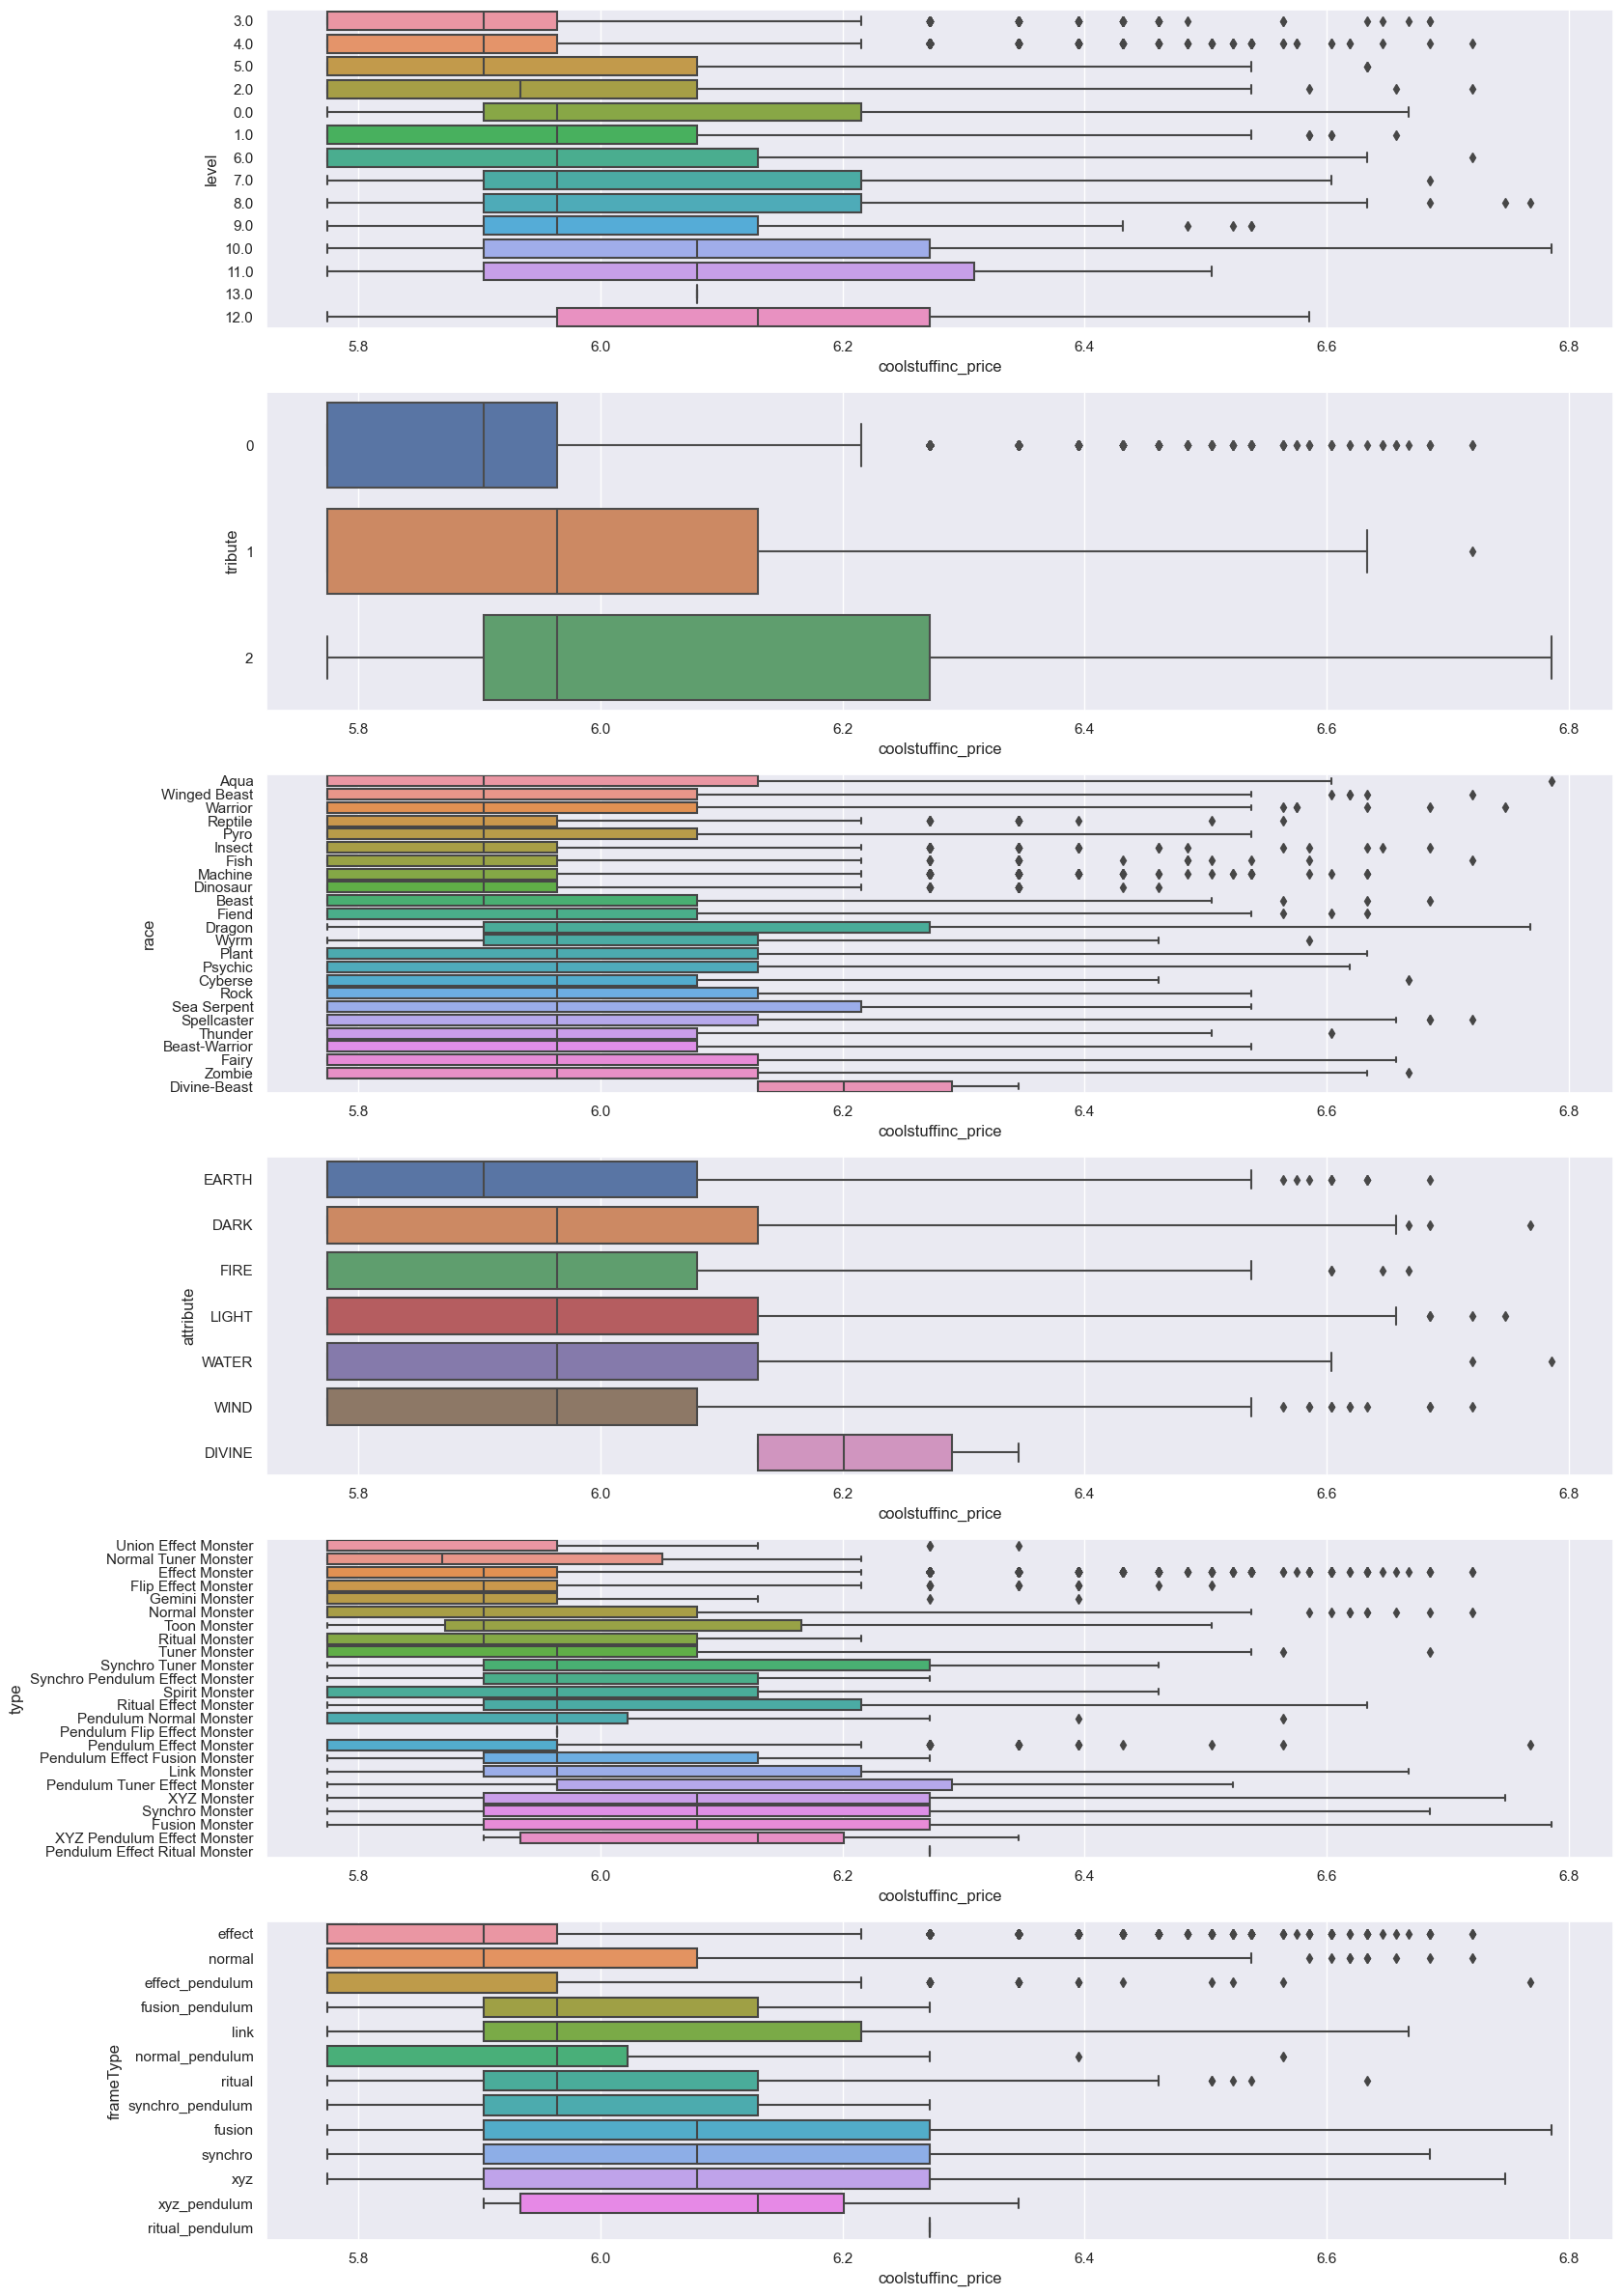

avg_price


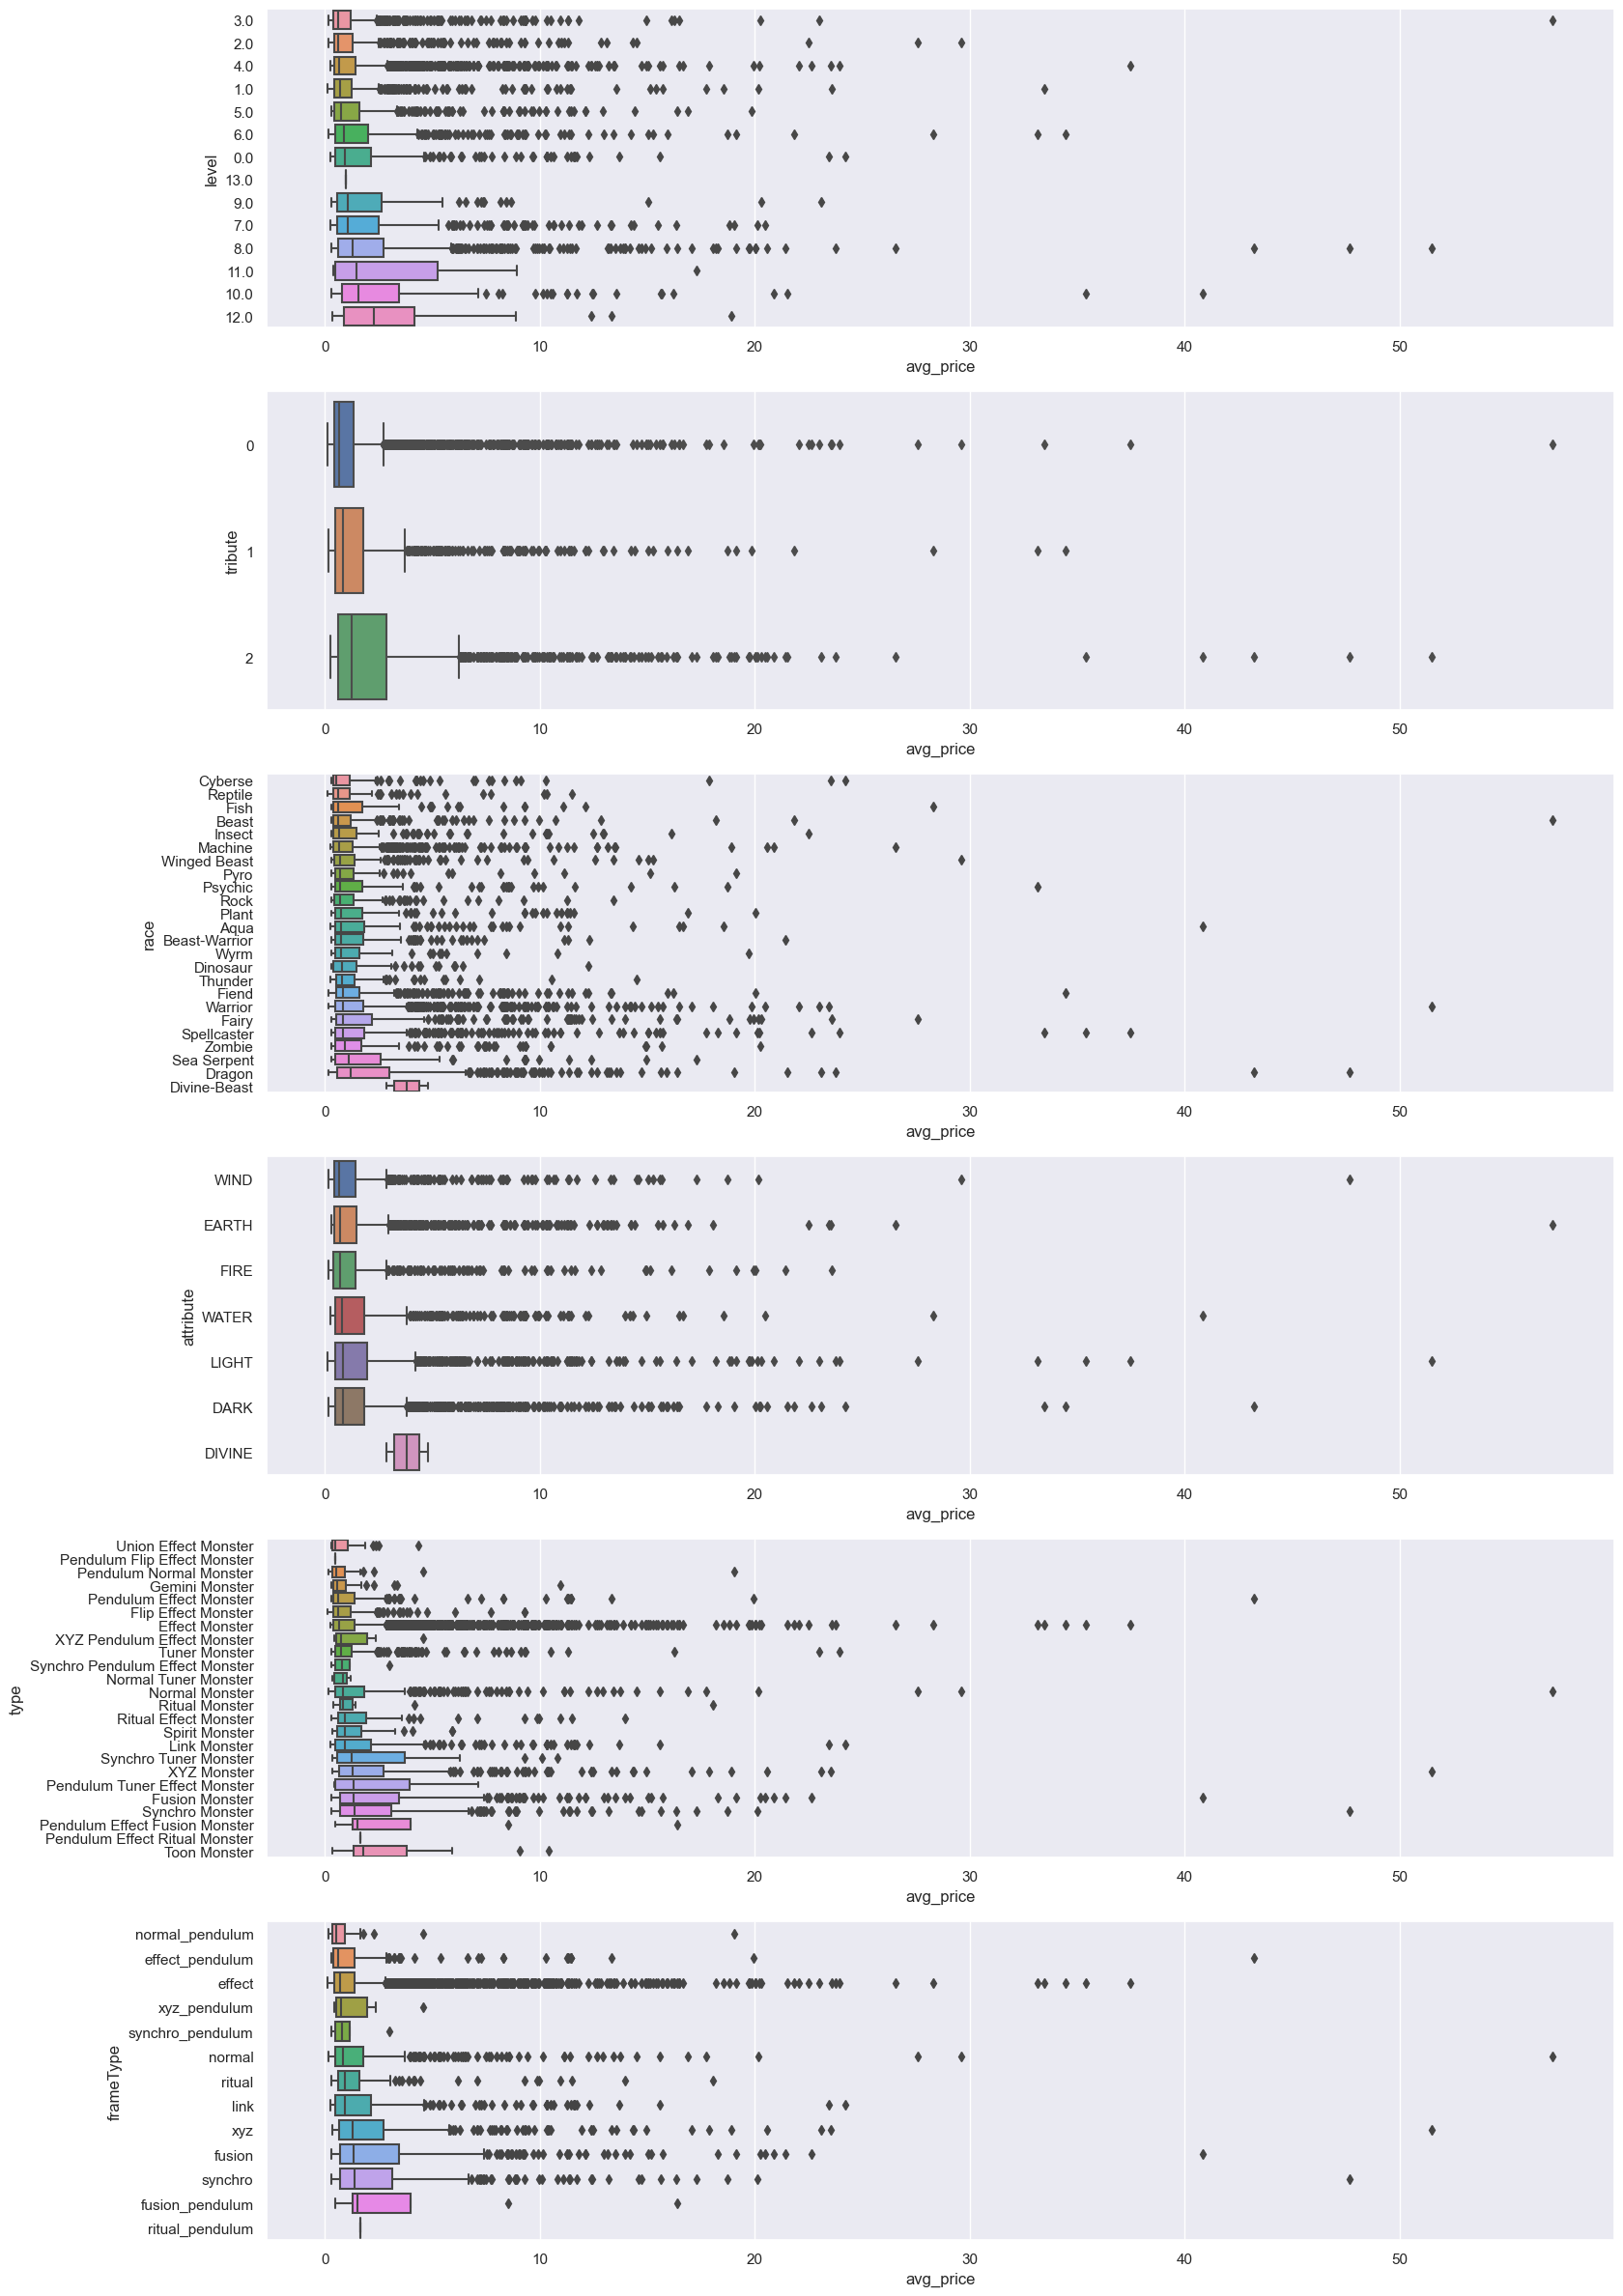

In [37]:
#yugioh_data.info()
#yugioh_data.head()

for price_var in price_columns:
    print(price_var)
    f, axes = plt.subplots(len(categories), 1, figsize=(18, 30))
    count = 0
    for var in categories:
        sb.boxplot(data = yugioh_data_categorical, x=price_var, y=var, orient = 'h', ax = axes[count], order = yugioh_data_categorical.groupby(var)[price_var].median().sort_values().index)
        count+=1
    plt.show()

Given the lack of conclusive results from the EDA for categorical variable of card price, we decided to exlplore two other categorical variable mainly `tribute` and `frameType`

# EDA of Categorical Variable of Sacrifice
Using the following variables to predict `tribute`: `atk`, `def`, `atk+def`, `atkSq`, `defSq`, `atkSq+defSq`

In Yu-Gi-Oh, when a monster is level 5 or above it would require sacrifice to summon it. Thus by using the folling variable, we would be checking if it is possible to predict if a monster requires sacrifice to summon.

In [38]:
categories = ['atk','def','atk+def','atkSq','defSq','atkSq+defSq','tribute']
yugioh_data_categorical = yugioh_data[categories]
#yugioh_data_categorical = yugioh_data_categorical[(yugioh_data_categorical['frameType'] == "normal")]

print(yugioh_data_categorical['tribute'].value_counts())

tribute
0    4456
2    1470
1    1111
Name: count, dtype: int64


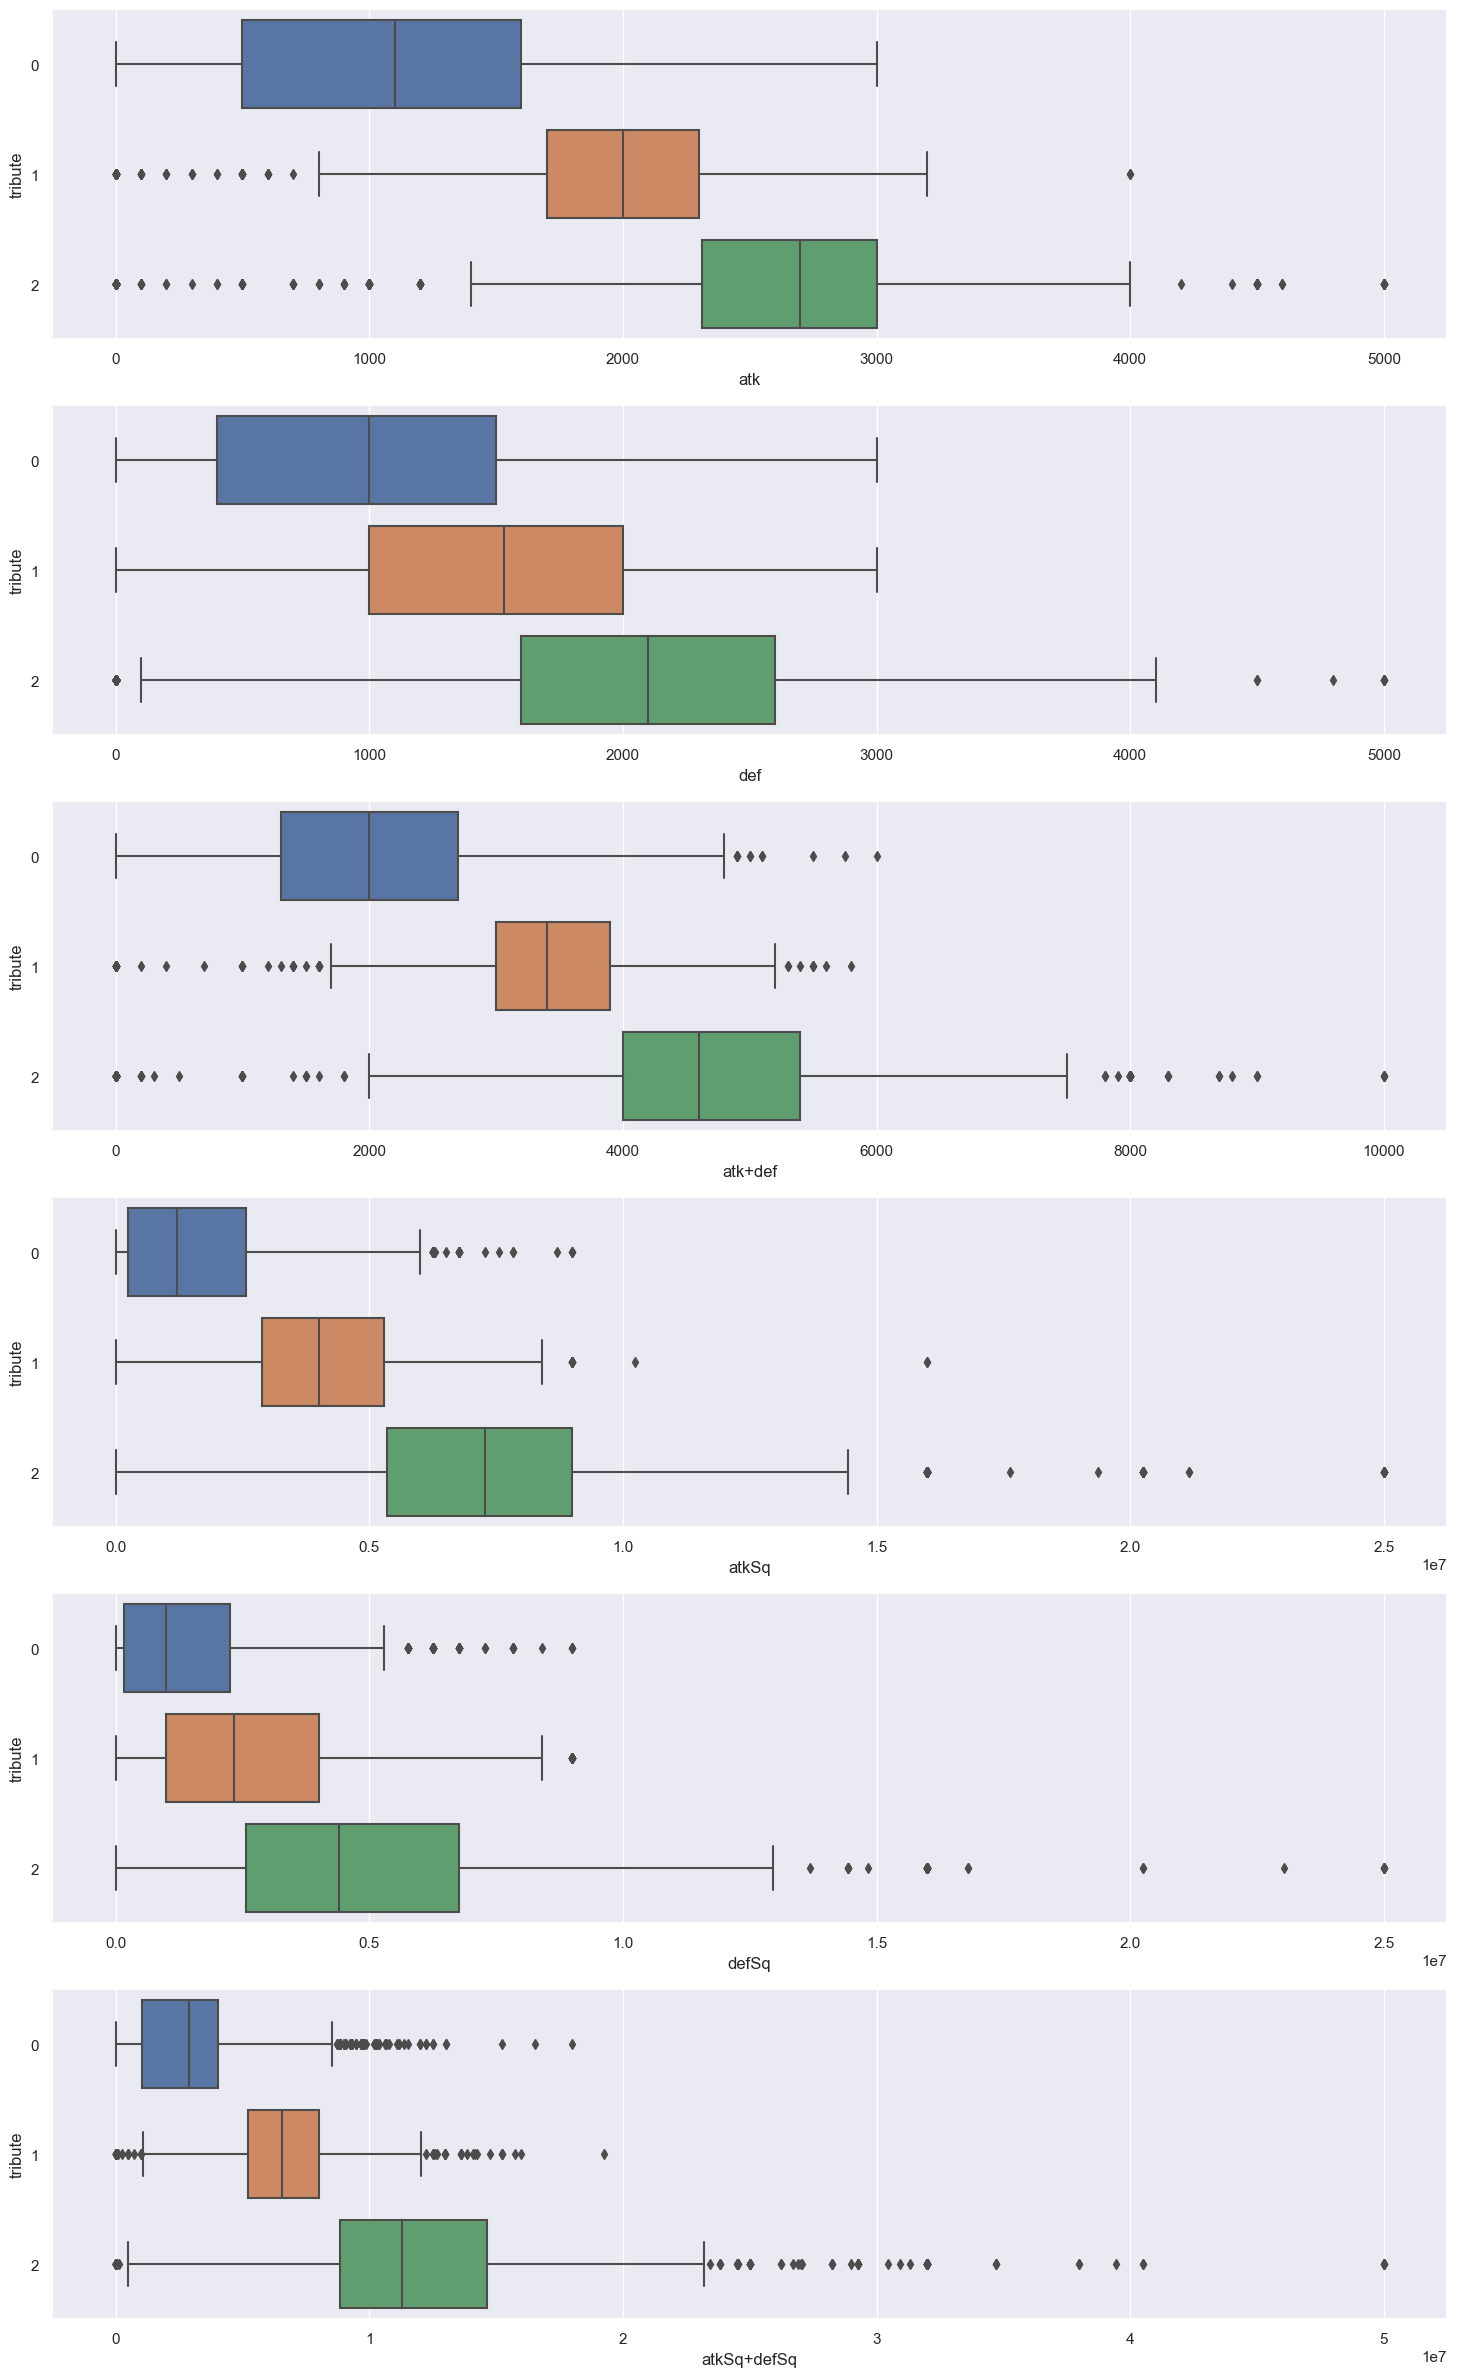

In [39]:
#yugioh_data.info()
#yugioh_data.head()

f, axes = plt.subplots(len(categories)-1, 1, figsize=(18, 30))
count = 0
for var in categories[:-1]:
    sb.boxplot(x = var, y = 'tribute', data = yugioh_data_categorical, orient = "h", ax = axes[count])
    count+=1


# EDA of Categorical Variable of Cards with Effect
Using the following variables to predict `effect`: `atk`, `def`, `atk+def`, `atkSq`, `defSq`, `atkSq+defSq`

In Yu-Gi-Oh, when a monsters can have unique effect. We would be checking if it is possible to predict if a monster is likely to have an effect using the base variables of a monster card.

In [40]:
categories = ['atk','def','atk+def','atkSq','defSq','atkSq+defSq','effect']
yugioh_data_categorical = yugioh_data[categories]
#yugioh_data_categorical = tribute0[categories]

#yugioh_data_categorical = yugioh_data_categorical[(yugioh_data_categorical['frameType'] == "normal")]

print(yugioh_data_categorical['effect'].value_counts())

effect
1    6920
0     470
Name: count, dtype: Int64


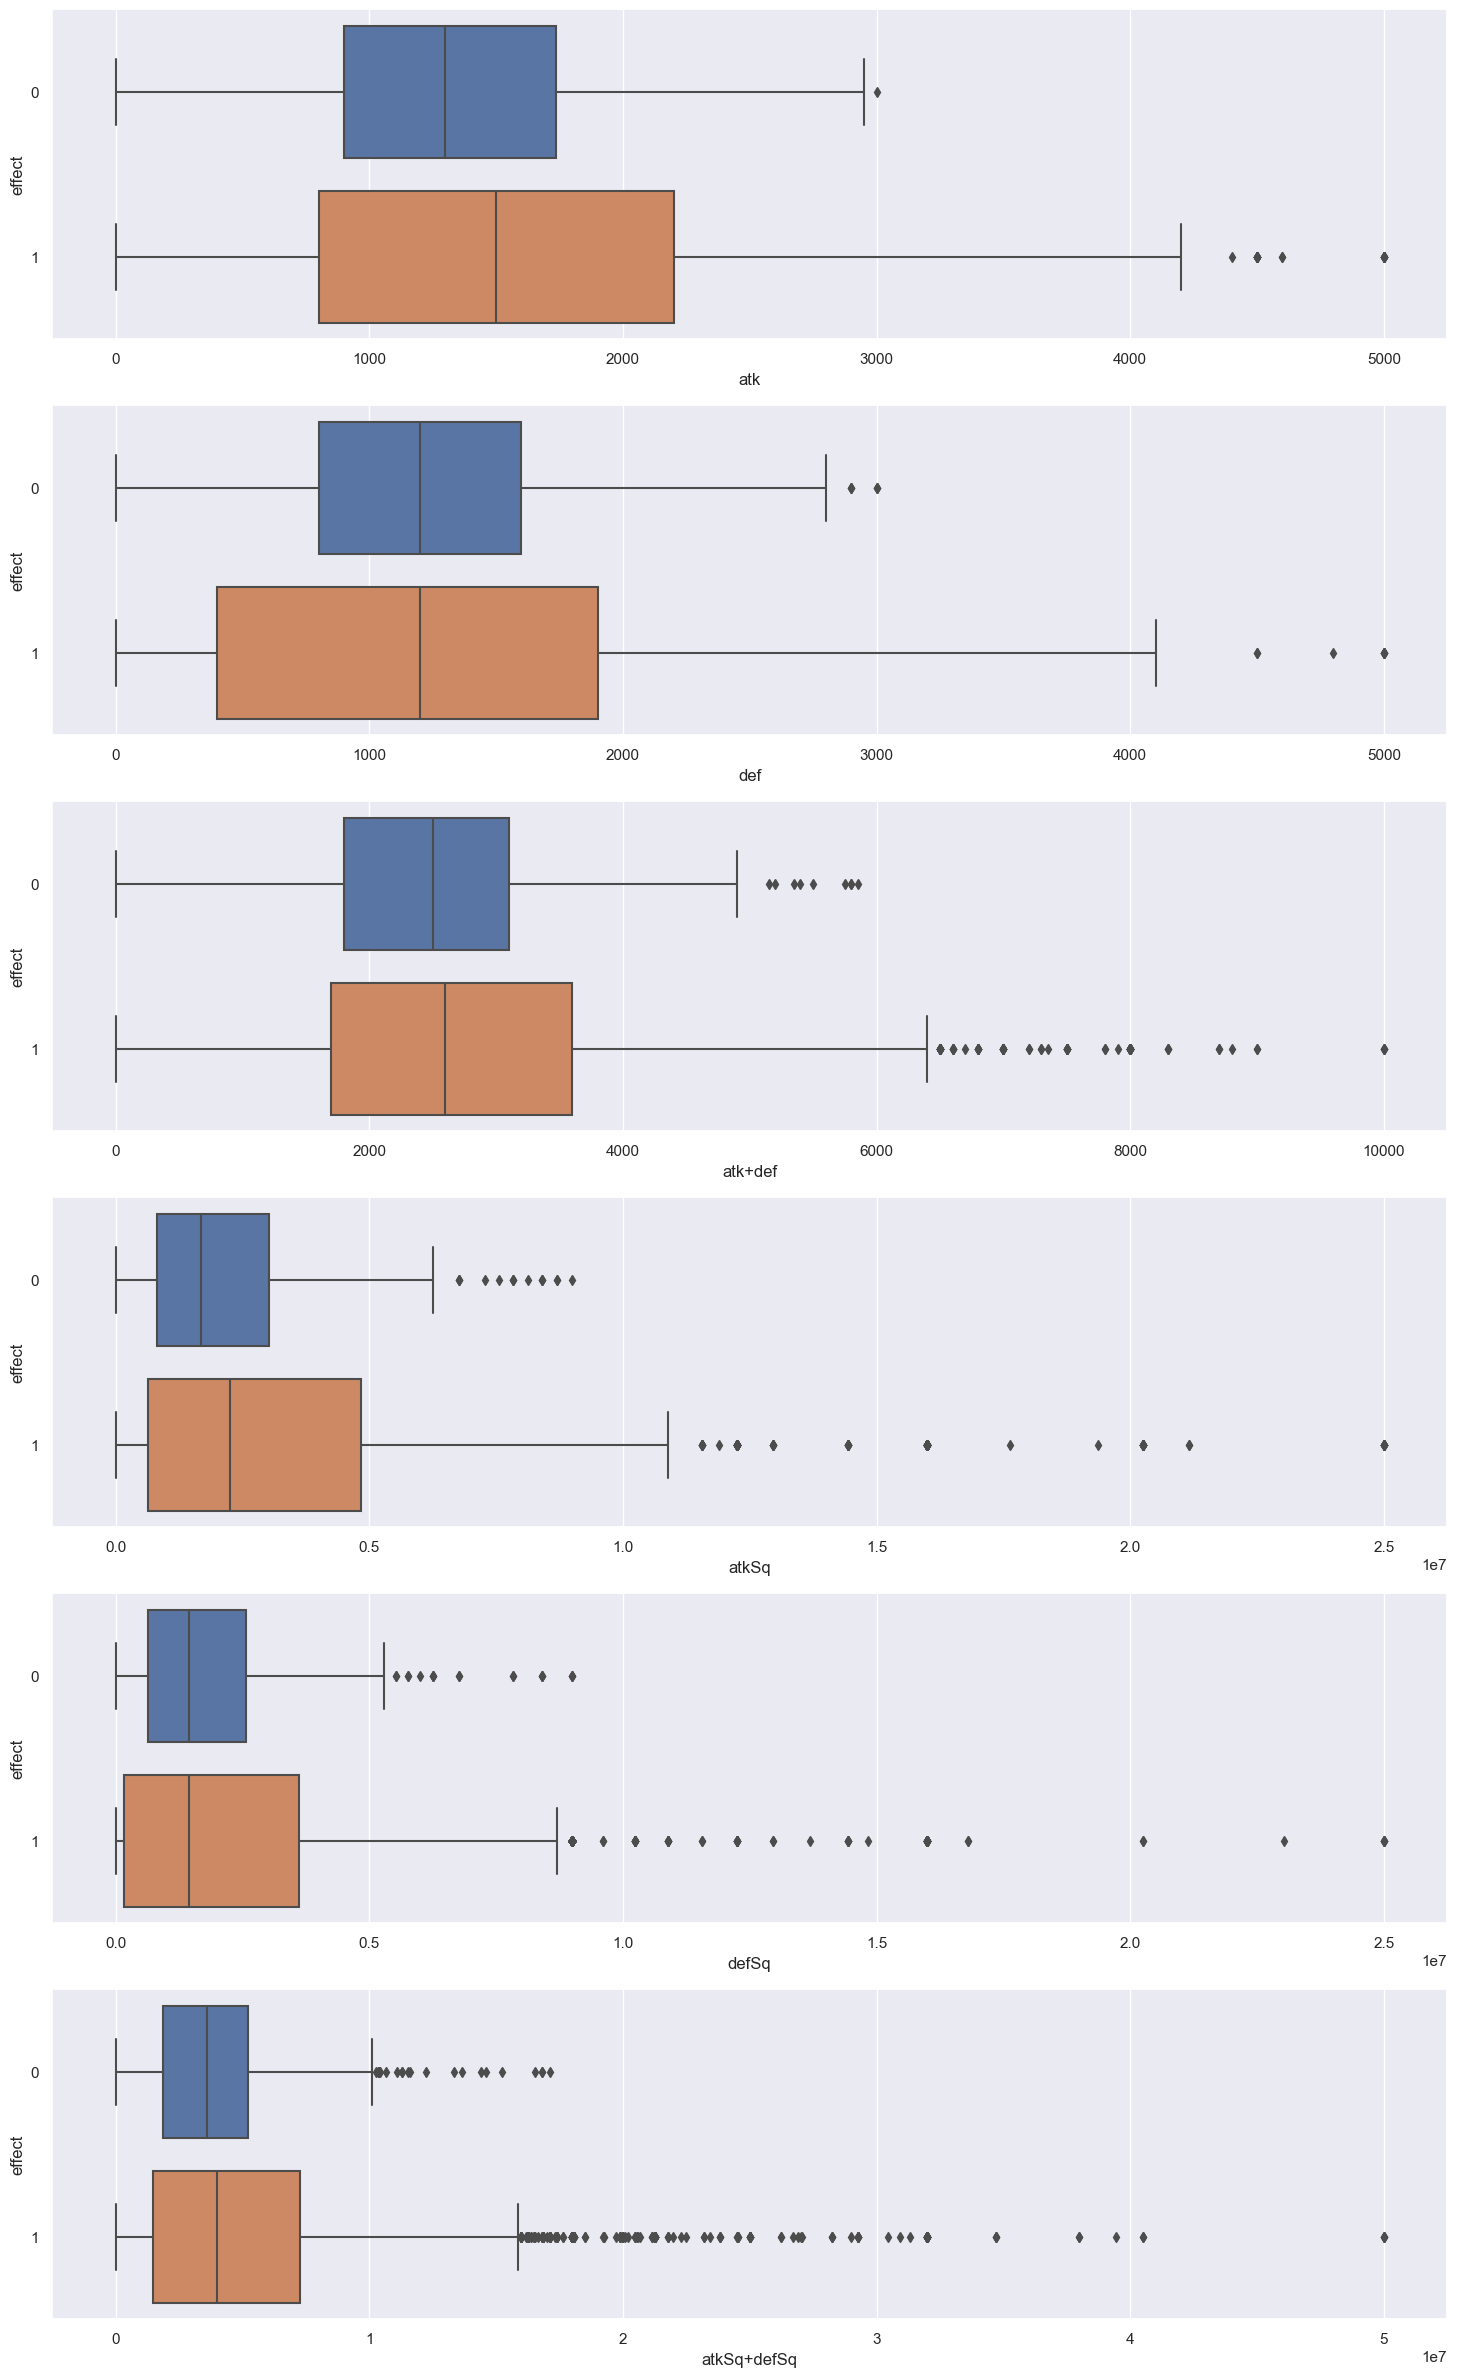

In [41]:
#yugioh_data.info()
#yugioh_data.head()

f, axes = plt.subplots(len(categories)-1, 1, figsize=(18, 30))
count = 0
for var in categories[:-1]:
    sb.boxplot(x = var, y = 'effect', data = yugioh_data_categorical, orient = "h", ax = axes[count])
    count+=1

In [42]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

def tree_measure(CM):
    
    TN = CM[0][0]
    FN = CM[0][1]
    TP = CM[1][1]
    FP = CM[1][0]
    #print("TN:", TN)
    #print("FN:", FN)
    #print("TP:", TP)
    #print("FP:", FP)

    # True positive rate
    TPR = TP/(TP+FN)
    print("True positive rate: ", TPR)
    
    # False positive rate
    FPR = FP/(FP+TN)
    print("False positive rate: ", FPR)
    
    # True negative rate
    #TNR = TN/(TN+FP) 
    
    # False negative rate
    #FNR = FN/(TP+FN)
    
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Classification Accuracy: ", ACC)

def create_DecTree_ConfusionMatrix(x_var=None, y_var=None, df=None):
    # Extract collumns Dataset
    y_data = pd.DataFrame(df[y_var])   # Response
    x_data = pd.DataFrame(df[x_var])   # Predictor

    # Split into Train and Test at 75:25 ratio
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=10)

    dectree = DecisionTreeClassifier(max_depth = 3)
    # Decision Tree using Train Data
    dectree.fit(x_train, y_train)                    # train the decision tree model
    print()
    
    # Plot Decision tree
    f = plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, feature_names=[x_var], class_names=["No","Yes"], fontsize=12)

    # Predict Train and Test
    y_train_pred = dectree.predict(x_train)
    y_test_pred = dectree.predict(x_test)

    #Creating two-way Confusion Matrix for train and test
    CM_train = confusion_matrix(y_train, y_train_pred)
    CM_test = confusion_matrix(y_test, y_test_pred)

    # Print the Classification Accuracy, True Positive Rate and False Positive Rate
    print("===Using", x_var, "to predict", y_var, "===")
    print("\nTrain:")
    tree_measure(CM_train)
    print("\nTest:")
    tree_measure(CM_test)

    # Plot the two-way Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    return dectree, x_train, x_test, y_train, y_test

# Creating Decision Tree for sarifice
Predicting if a monster requires sarifice.

In [43]:
yugioh_data['sacrifice'].value_counts()

sacrifice
0    4462
1    2581
Name: count, dtype: Int64

In [44]:
yugioh_data['sacrifice'].isnull().values.any()

True

In [45]:
yugioh_data.info()
categories = ['atk','def','level']
yugioh_data_decisionTree_ban = yugioh_data[['atk','def','level','ban']]

<class 'pandas.core.frame.DataFrame'>
Index: 7390 entries, 0 to 8223
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               7390 non-null   int64   
 1   id                  7390 non-null   int64   
 2   name                7390 non-null   object  
 3   type                7390 non-null   object  
 4   frameType           7390 non-null   object  
 5   race                7390 non-null   object  
 6   archetype           4647 non-null   object  
 7   card_sets           7390 non-null   object  
 8   card_prices         7390 non-null   object  
 9   atk                 7390 non-null   float64 
 10  def                 7390 non-null   float64 
 11  level               7390 non-null   float64 
 12  attribute           7390 non-null   object  
 13  banlist_info        160 non-null    object  
 14  cardmarket_price    7390 non-null   float64 
 15  tcgplayer_price     7390 non-null   float64

In [49]:
list(X_train.columns)

['atk', 'def', 'level']

[Text(0.36363636363636365, 0.9, 'level <= 0.5\ngini = 0.041\nsamples = 5173\nvalue = [5066, 107]\nclass = Bad'),
 Text(0.09090909090909091, 0.7, 'atk <= 850.0\ngini = 0.103\nsamples = 239\nvalue = [226, 13]\nclass = Bad'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = Bad'),
 Text(0.13636363636363635, 0.5, 'atk <= 950.0\ngini = 0.12\nsamples = 202\nvalue = [189, 13]\nclass = Bad'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.18181818181818182, 0.3, 'atk <= 1050.0\ngini = 0.112\nsamples = 201\nvalue = [189, 12]\nclass = Bad'),
 Text(0.13636363636363635, 0.1, 'gini = 0.211\nsamples = 25\nvalue = [22, 3]\nclass = Bad'),
 Text(0.22727272727272727, 0.1, 'gini = 0.097\nsamples = 176\nvalue = [167, 9]\nclass = Bad'),
 Text(0.6363636363636364, 0.7, 'def <= 2975.0\ngini = 0.037\nsamples = 4934\nvalue = [4840, 94]\nclass = Bad'),
 Text(0.45454545454545453, 0.5, 'atk <= 3900.0\ngini = 0.036\nsamples = 476

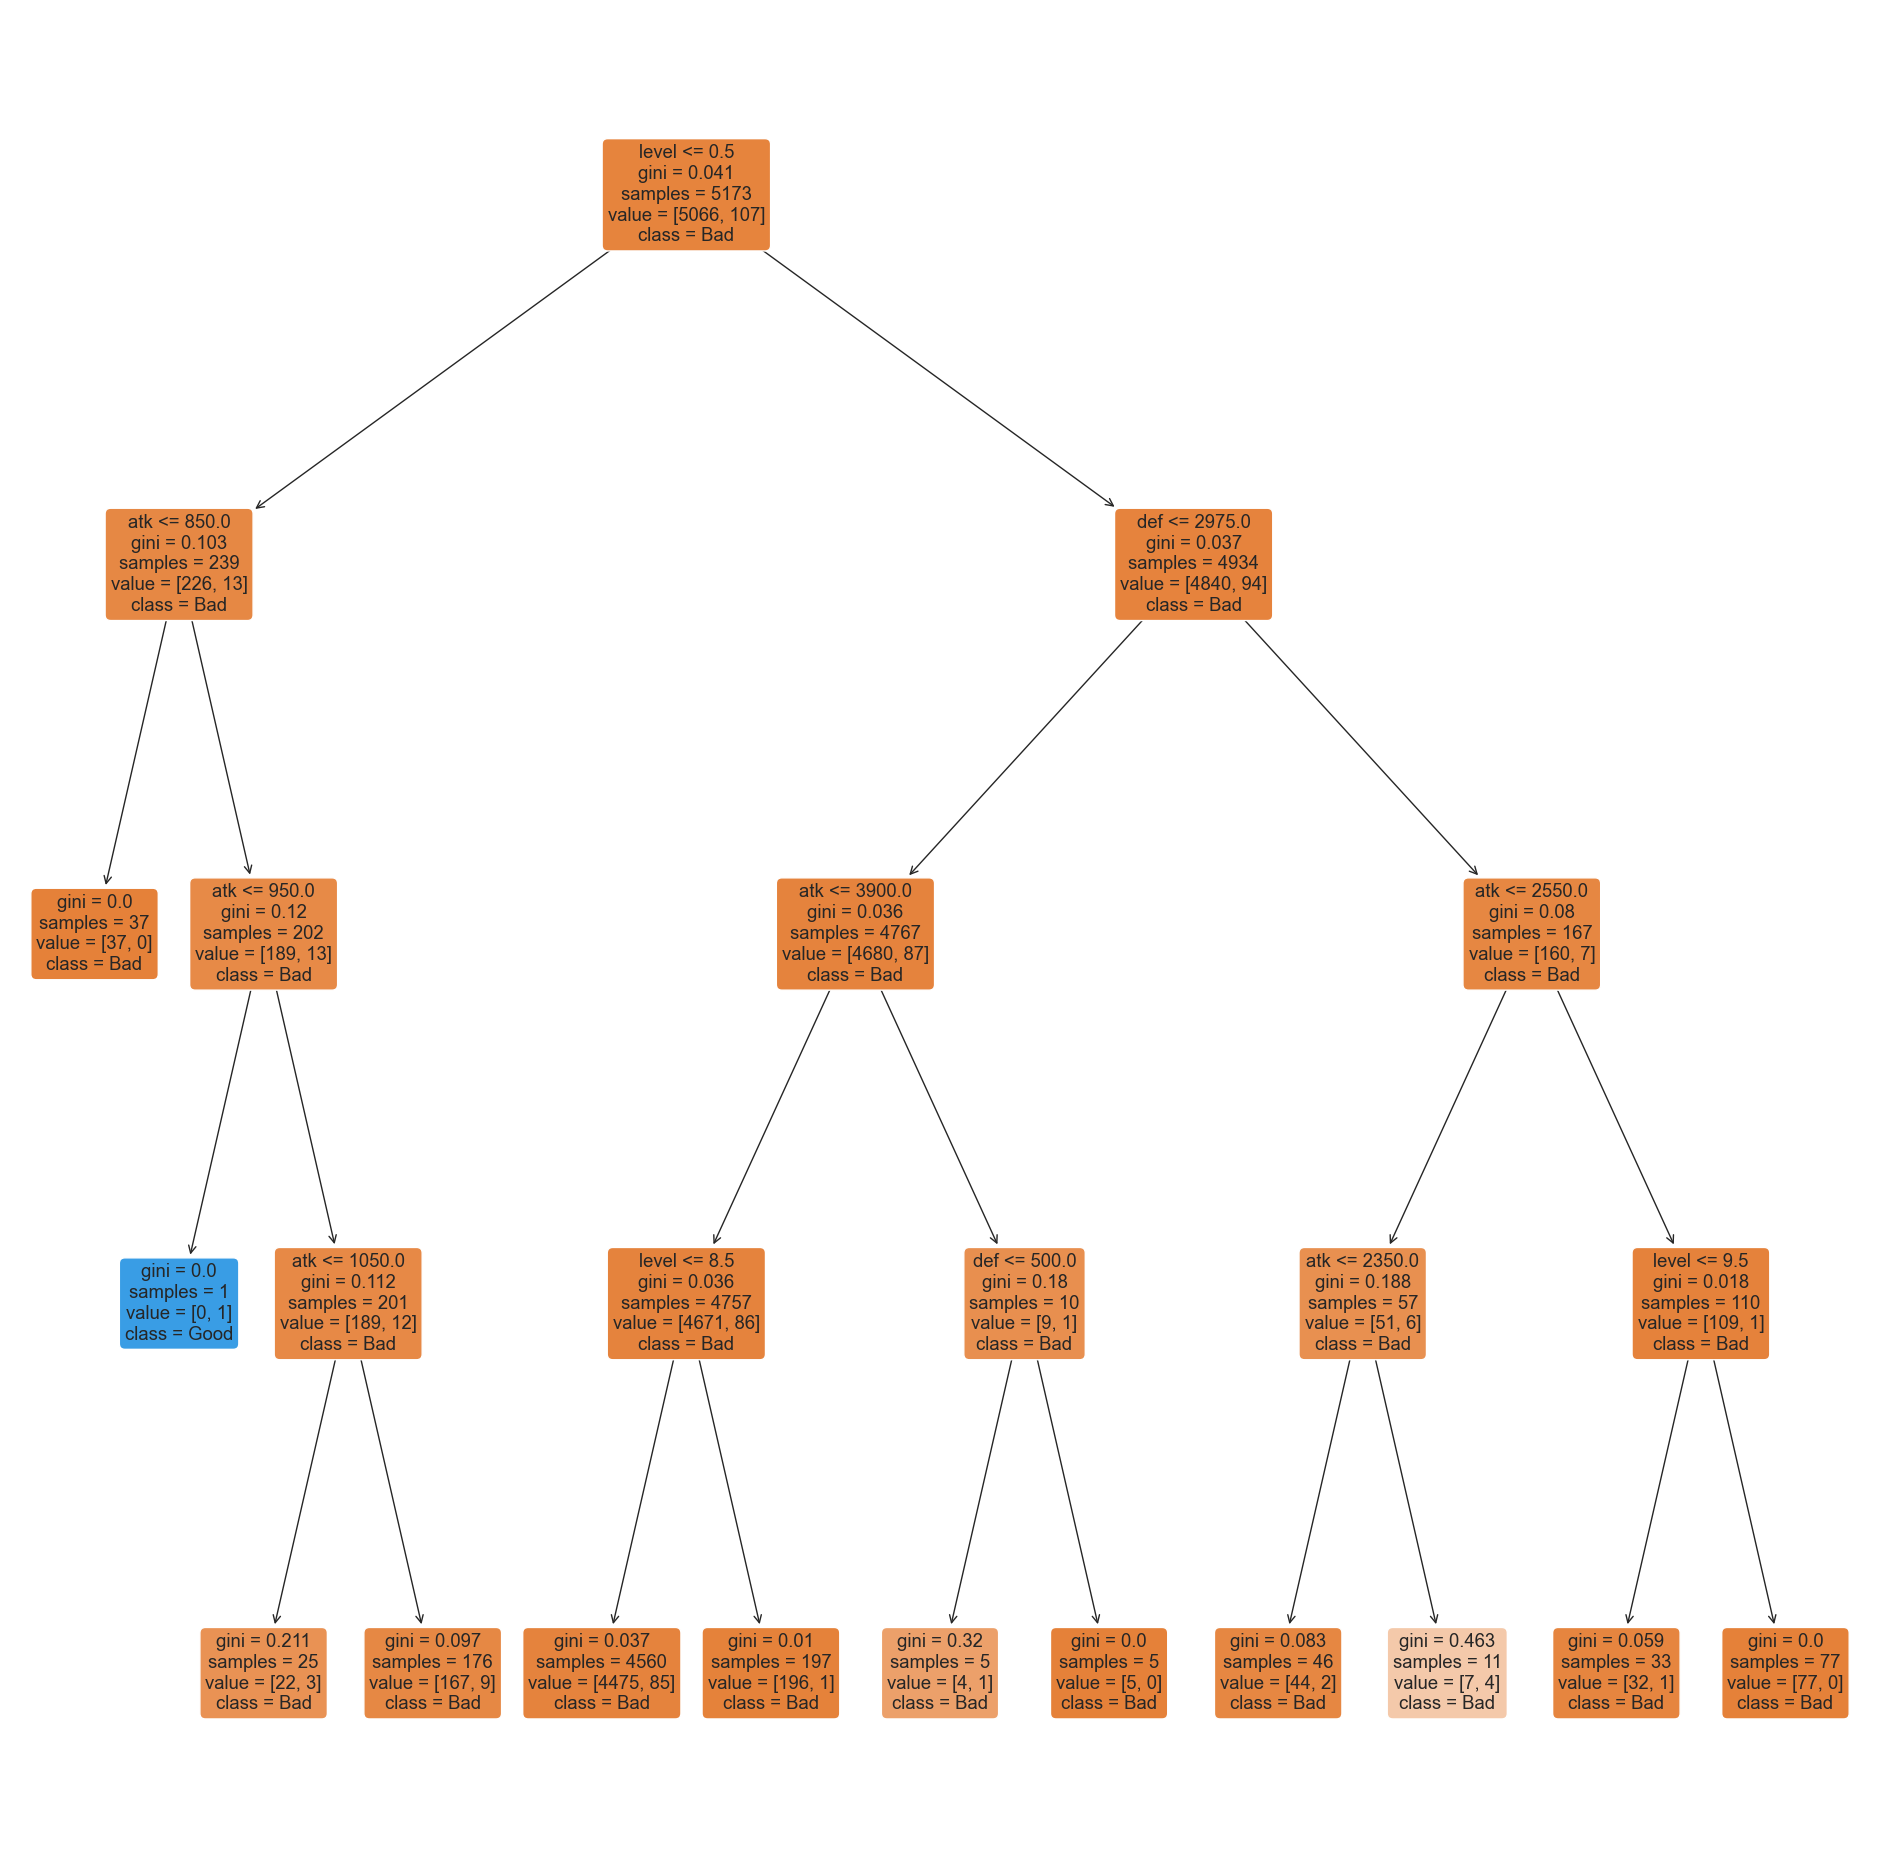

In [50]:
y = pd.DataFrame(yugioh_data_decisionTree_ban['ban'])
X = pd.DataFrame(yugioh_data_decisionTree_ban.drop('ban', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(X_train.columns), 
          class_names=["Bad","Good"])

In [ ]:
categories = ['atk','def','atk+def','atkSq','defSq','atkSq+defSq','effect']

dectree, x_train, x_test, y_train, y_test = create_DecTree_ConfusionMatrix(x_var=categories, y_var="ban", df=yugioh_data)